<a href="https://colab.research.google.com/github/ayanoglu/OrtalamaTahmin/blob/main/REDGPA_2022_NEWandOLDDATA_18COMB_OCSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from numpy import array
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
np.set_printoptions(linewidth=160)
import tensorflow as tf
import csv
import math
import matplotlib.pyplot as plt
from decimal import *
from google.colab import files
import plotly.graph_objects as go
import plotly.express as px
import itertools
from itertools import combinations
import time
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn import metrics


from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
from google.colab import files
import io
uploaded = files.upload()

Saving EE post spring 22.csv to EE post spring 22.csv
Saving EE pretest fall 22.csv to EE pretest fall 22.csv
Saving EE Seniors.csv to EE Seniors.csv
Saving EE Students Spring 2021 from PAUL.csv to EE Students Spring 2021 from PAUL.csv
Saving Engineering Evaluation Spring 2021.csv to Engineering Evaluation Spring 2021.csv
Saving Engineering Freshmen Fall 21 - January 31 22 from PAUL.csv to Engineering Freshmen Fall 21 - January 31 22 from PAUL.csv
Saving Engineering Freshmen Spring 2021 from PAUL.csv to Engineering Freshmen Spring 2021 from PAUL.csv
Saving Engineering Freshmen Spring 2021.csv to Engineering Freshmen Spring 2021.csv
Saving Engineering Freshmen Survey.csv to Engineering Freshmen Survey.csv
Saving Ferekides post fall21.csv to Ferekides post fall21.csv
Saving Ferekides post spring 22.csv to Ferekides post spring 22.csv
Saving Ferekides pre fall21.csv to Ferekides pre fall21.csv
Saving Ferekides pre sp22.csv to Ferekides pre sp22.csv
Saving Jeong post fall21.csv to Jeong po

In [3]:
# OLD DATASETS FROM PAUL

DF_EEStudentsSpring2021fromPAUL = pd.read_csv(io.BytesIO(uploaded['EE Students Spring 2021 from PAUL.csv']), header=None, skip_blank_lines=True)
DF_EngFreshmenFall2021fromPAUL = pd.read_csv(io.BytesIO(uploaded['Engineering Freshmen Fall 21 - January 31 22 from PAUL.csv']), header=None, skip_blank_lines=True)
DF_EngFreshmenSpring2021fromPAUL = pd.read_csv(io.BytesIO(uploaded['Engineering Freshmen Spring 2021 from PAUL.csv']), header=None, skip_blank_lines=True)
DF_PsychologyMay2021fromPAUL = pd.read_csv(io.BytesIO(uploaded['Psychology Subject Pool May 2021 - Jan 31 2022 from PAUL.csv']), header=None, skip_blank_lines=True)
DF_PsychologySpring2021fromPAUL = pd.read_csv(io.BytesIO(uploaded['Psychology Subject Pool Spring 2021 from PAUL.csv']), header=None, skip_blank_lines=True)


In [4]:
# NEW RECENTLY DOWNLOADED DATASETS

DF_EE_post_spring_22 = pd.read_csv(io.BytesIO(uploaded['EE post spring 22.csv']), header=None, skip_blank_lines=True)
DF_EE_pretest_fall_22 = pd.read_csv(io.BytesIO(uploaded['EE pretest fall 22.csv']), header=None, skip_blank_lines=True)
DF_EE_Seniors = pd.read_csv(io.BytesIO(uploaded['EE Seniors.csv']), header=None, skip_blank_lines=True)
DF_Engineering_Evaluation_Spring_2021 = pd.read_csv(io.BytesIO(uploaded['Engineering Evaluation Spring 2021.csv']), header=None, skip_blank_lines=True)
DF_Engineering_Freshmen_Spring_2021 = pd.read_csv(io.BytesIO(uploaded['Engineering Freshmen Spring 2021.csv']), header=None, skip_blank_lines=True)
DF_Engineering_Freshmen_Survey = pd.read_csv(io.BytesIO(uploaded['Engineering Freshmen Survey.csv']), header=None, skip_blank_lines=True)
DF_Psychology_Student_Experience = pd.read_csv(io.BytesIO(uploaded['Psychology Student Experience.csv']), header=None, skip_blank_lines=True)
DF_Summer_21_Psychology_Student_Experience = pd.read_csv(io.BytesIO(uploaded['Summer 21 Psychology Student Experience.csv']), header=None, skip_blank_lines=True)


In [5]:
# Check if 3 suspected datasets are same

print(f'Dataframes equal? .. {DF_EEStudentsSpring2021fromPAUL.equals(DF_Engineering_Evaluation_Spring_2021)}')
print(f'Dataframes equal? .. {DF_EngFreshmenSpring2021fromPAUL.equals(DF_Engineering_Freshmen_Spring_2021)}')
print(f'Dataframes equal? .. {DF_PsychologySpring2021fromPAUL.equals(DF_Psychology_Student_Experience)}')

Dataframes equal? .. False
Dataframes equal? .. False
Dataframes equal? .. False


In [6]:
# NEW RECENTLEY DOWNLOADED DATASETS 
# Question Title Check
DF_EE_pretest_fall_22_TT = DF_EE_pretest_fall_22.iloc[0:1,18:80]
DF_EE_Seniors_TT = DF_EE_Seniors.iloc[0:1,18:80]
DF_Engineering_Evaluation_Spring_2021_TT = DF_Engineering_Evaluation_Spring_2021.iloc[0:1,18:80]
DF_Engineering_Freshmen_Spring_2021_TT = DF_Engineering_Freshmen_Spring_2021.iloc[0:1,18:80]
DF_Engineering_Freshmen_Survey_TT = DF_Engineering_Freshmen_Survey.iloc[0:1,18:80]
DF_Psychology_Student_Experience_TT = DF_Psychology_Student_Experience.iloc[0:1,18:80]
DF_Summer_21_Psychology_Student_Experience_TT = DF_Summer_21_Psychology_Student_Experience.iloc[0:1,18:80]

#only one seemed to be different
DF_EE_post_spring_22_TT = DF_EE_post_spring_22.iloc[0:1,18:78]
DF_EE_post_spring_22_TT = pd.concat([DF_EE_post_spring_22_TT, DF_EE_post_spring_22.iloc[0:1,93:95]], axis = 1)

DF_EE_post_spring_22_TT.columns = range(DF_EE_post_spring_22_TT.columns.size)
DF_EE_pretest_fall_22_TT.columns = range(DF_EE_pretest_fall_22_TT.columns.size)
DF_EE_Seniors_TT.columns = range(DF_EE_Seniors_TT.columns.size)
DF_Engineering_Evaluation_Spring_2021_TT.columns = range(DF_Engineering_Evaluation_Spring_2021_TT.columns.size)
DF_Engineering_Freshmen_Spring_2021_TT.columns = range(DF_Engineering_Freshmen_Spring_2021_TT.columns.size)
DF_Engineering_Freshmen_Survey_TT.columns = range(DF_Engineering_Freshmen_Survey_TT.columns.size)
DF_Psychology_Student_Experience_TT.columns = range(DF_Psychology_Student_Experience_TT.columns.size)
DF_Summer_21_Psychology_Student_Experience_TT.columns = range(DF_Summer_21_Psychology_Student_Experience_TT.columns.size)

print(f'Dataframes equal? .. {DF_EE_post_spring_22_TT.equals(DF_EE_pretest_fall_22_TT)}')
print(f'Dataframes equal? .. {DF_EE_post_spring_22_TT.equals(DF_EE_Seniors_TT)}')
print(f'Dataframes equal? .. {DF_EE_pretest_fall_22_TT.equals(DF_EE_Seniors_TT)}')
print(f'Dataframes equal? .. {DF_EE_Seniors_TT.equals(DF_Engineering_Evaluation_Spring_2021_TT)}')
print(f'Dataframes equal? .. {DF_Engineering_Evaluation_Spring_2021_TT.equals(DF_Engineering_Freshmen_Spring_2021_TT)}')
print(f'Dataframes equal? .. {DF_Engineering_Freshmen_Spring_2021_TT.equals(DF_Engineering_Freshmen_Survey_TT)}')
print(f'Dataframes equal? .. {DF_Engineering_Freshmen_Survey_TT.equals(DF_Psychology_Student_Experience_TT)}')
print(f'Dataframes equal? .. {DF_Psychology_Student_Experience_TT.equals(DF_Summer_21_Psychology_Student_Experience_TT)}')


Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True


In [18]:
# NEW RECENTLEY DOWNLOADED DATASETS 

DF1_EE_pretest_fall_22 = DF_EE_pretest_fall_22.iloc[3:,18:80]
DF1_EE_Seniors = DF_EE_Seniors.iloc[3:,18:80]
DF1_Engineering_Evaluation_Spring_2021 = DF_Engineering_Evaluation_Spring_2021.iloc[3:,18:80]
DF1_Engineering_Freshmen_Spring_2021 = DF_Engineering_Freshmen_Spring_2021.iloc[3:,18:80]
DF1_Engineering_Freshmen_Survey = DF_Engineering_Freshmen_Survey.iloc[3:,18:80]
DF1_Psychology_Student_Experience = DF_Psychology_Student_Experience.iloc[3:,18:80]
DF1_Summer_21_Psychology_Student_Experience = DF_Summer_21_Psychology_Student_Experience.iloc[3:,18:80]

#only one seemed to be different
DF1_EE_post_spring_22 = DF_EE_post_spring_22.iloc[3:,18:78]
DF1_EE_post_spring_22 = pd.concat([DF1_EE_post_spring_22, DF_EE_post_spring_22.iloc[3:,93:95]], axis = 1)

DF1_EE_pretest_fall_22.columns = range(DF1_EE_pretest_fall_22.columns.size)
DF1_EE_Seniors.columns = range(DF1_EE_Seniors.columns.size)
DF1_Engineering_Evaluation_Spring_2021.columns = range(DF1_Engineering_Evaluation_Spring_2021.columns.size)
DF1_Engineering_Freshmen_Spring_2021.columns = range(DF1_Engineering_Freshmen_Spring_2021.columns.size)
DF1_Engineering_Freshmen_Survey.columns = range(DF1_Engineering_Freshmen_Survey.columns.size)
DF1_Psychology_Student_Experience.columns = range(DF1_Psychology_Student_Experience.columns.size)
DF1_Summer_21_Psychology_Student_Experience.columns = range(DF1_Summer_21_Psychology_Student_Experience.columns.size)
DF1_EE_post_spring_22.columns = range(DF1_EE_post_spring_22.columns.size)

In [8]:
(DF_Engineering_Freshmen_Survey_TT.iloc[:,:] == DF_Psychology_Student_Experience_TT.iloc[:,:])

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [9]:
# FREKIDES AND JEONG PAIR DATASETS

DF_Frekides_Post_FALL21 = pd.read_csv(io.BytesIO(uploaded['Ferekides post fall21.csv']), header=None, skip_blank_lines=True)
DF_Frekides_Post_SPRING22 = pd.read_csv(io.BytesIO(uploaded['Ferekides post spring 22.csv']), header=None, skip_blank_lines=True)
DF_Frekides_Pre_FALL21 = pd.read_csv(io.BytesIO(uploaded['Ferekides pre fall21.csv']), header=None, skip_blank_lines=True)
DF_Frekides_Pre_SPRING22 = pd.read_csv(io.BytesIO(uploaded['Ferekides pre sp22.csv']), header=None, skip_blank_lines=True)
DF_Jeong_Pre_FALL21 = pd.read_csv(io.BytesIO(uploaded['Jeong pretest fall21.csv']), header=None, skip_blank_lines=True)
DF_Jeong_Post_FALL21 = pd.read_csv(io.BytesIO(uploaded['Jeong post fall21.csv']), header=None, skip_blank_lines=True)

# Question Title Check
DF1_Fre_PRE_FALL21_TT = DF_Frekides_Pre_FALL21.iloc[0:1,18:80]
DF1_Fre_PRE_SPRING22_TT = DF_Frekides_Pre_SPRING22.iloc[0:1,18:80]
DF1_Jeong_Pre_FALL21_TT = DF_Jeong_Pre_FALL21.iloc[0:1,18:80]

DF1_Fre_POST_FALL21_TT = DF_Frekides_Post_FALL21.iloc[0:1,11:71]
DF1_Fre_POST_FALL21_TT = pd.concat([DF1_Fre_POST_FALL21_TT,DF_Frekides_Post_FALL21.iloc[0:1,86:88]], axis = 1)
DF1_Fre_POST_SPRING22_TT = DF_Frekides_Post_SPRING22.iloc[0:1,18:78]
DF1_Fre_POST_SPRING22_TT = pd.concat([DF1_Fre_POST_SPRING22_TT,DF_Frekides_Post_SPRING22.iloc[0:1,93:95]], axis = 1)
DF1_Jeong_Post_FALL21_TT = DF_Jeong_Post_FALL21.iloc[0:1,18:78]
DF1_Jeong_Post_FALL21_TT = pd.concat([DF1_Jeong_Post_FALL21_TT,DF_Jeong_Post_FALL21.iloc[0:1,93:95]], axis = 1)

DF1_Fre_PRE_FALL21_TT.columns = range(DF1_Fre_PRE_FALL21_TT.columns.size)
DF1_Fre_PRE_SPRING22_TT.columns = range(DF1_Fre_PRE_SPRING22_TT.columns.size)
DF1_Jeong_Pre_FALL21_TT.columns = range(DF1_Jeong_Pre_FALL21_TT.columns.size)
DF1_Fre_POST_FALL21_TT.columns = range(DF1_Fre_POST_FALL21_TT.columns.size)
DF1_Fre_POST_SPRING22_TT.columns = range(DF1_Fre_POST_SPRING22_TT.columns.size)
DF1_Jeong_Post_FALL21_TT.columns = range(DF1_Jeong_Post_FALL21_TT.columns.size)


In [10]:
# FREKIDES AND JEONG PAIR DATASETS

# Pairs have same questions?
print(f'Dataframes equal? .. {DF1_Fre_POST_SPRING22_TT.equals(DF1_Fre_PRE_SPRING22_TT)}')
print(f'Dataframes equal? .. {DF1_Jeong_Post_FALL21_TT.equals(DF1_Jeong_Pre_FALL21_TT)}')
print(f'Dataframes equal? .. {DF1_Fre_POST_FALL21_TT.equals(DF1_Fre_PRE_FALL21_TT)}')

# "PRE" have same questions?
print(f'Dataframes equal? .. {DF1_Fre_PRE_FALL21_TT.equals(DF1_Fre_PRE_SPRING22_TT)}')
print(f'Dataframes equal? .. {DF1_Fre_PRE_FALL21_TT.equals(DF1_Jeong_Pre_FALL21_TT)}')
print(f'Dataframes equal? .. {DF1_Fre_PRE_SPRING22_TT.equals(DF1_Jeong_Pre_FALL21_TT)}')

# "POST" have same questions?
print(f'Dataframes equal? .. {DF1_Fre_POST_FALL21_TT.equals(DF1_Fre_POST_SPRING22_TT)}')
print(f'Dataframes equal? .. {DF1_Fre_POST_FALL21_TT.equals(DF1_Jeong_Post_FALL21_TT)}')
print(f'Dataframes equal? .. {DF1_Fre_POST_SPRING22_TT.equals(DF1_Jeong_Post_FALL21_TT)}')

Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True


In [11]:
DF1_Fre_PRE_FALL21 = DF_Frekides_Pre_FALL21.iloc[3:,18:80]
DF1_Fre_PRE_SPRING22 = DF_Frekides_Pre_SPRING22.iloc[3:,18:80]
DF1_Jeong_Pre_FALL21 = DF_Jeong_Pre_FALL21.iloc[3:,18:80]

DF1_Fre_POST_FALL21 = DF_Frekides_Post_FALL21.iloc[3:,11:71]
DF1_Fre_POST_FALL21 = pd.concat([DF1_Fre_POST_FALL21,DF_Frekides_Post_FALL21.iloc[3:,86:88]], axis = 1)
DF1_Fre_POST_SPRING22 = DF_Frekides_Post_SPRING22.iloc[3:,18:78]
DF1_Fre_POST_SPRING22 = pd.concat([DF1_Fre_POST_SPRING22,DF_Frekides_Post_SPRING22.iloc[3:,93:95]], axis = 1)
DF1_Jeong_Post_FALL21 = DF_Jeong_Post_FALL21.iloc[3:,18:78]
DF1_Jeong_Post_FALL21 = pd.concat([DF1_Jeong_Post_FALL21,DF_Jeong_Post_FALL21.iloc[3:,93:95]], axis = 1)

DF1_Fre_PRE_FALL21.columns = range(DF1_Fre_PRE_FALL21.columns.size)
DF1_Fre_PRE_SPRING22.columns = range(DF1_Fre_PRE_SPRING22.columns.size)
DF1_Jeong_Pre_FALL21.columns = range(DF1_Jeong_Pre_FALL21.columns.size)
DF1_Fre_POST_FALL21.columns = range(DF1_Fre_POST_FALL21.columns.size)
DF1_Fre_POST_SPRING22.columns = range(DF1_Fre_POST_SPRING22.columns.size)
DF1_Jeong_Post_FALL21.columns = range(DF1_Jeong_Post_FALL21.columns.size)

DF1FreJeoPre = pd.concat([DF1_Fre_PRE_FALL21, DF1_Fre_PRE_SPRING22, DF1_Jeong_Pre_FALL21], axis = 0)
DF1FreJeoPost = pd.concat([DF1_Fre_POST_FALL21, DF1_Fre_POST_SPRING22, DF1_Jeong_Post_FALL21], axis = 0)

print(f'Dataframe DF1FreJeoPre Shape before cleaning the data is .. {DF1FreJeoPre.shape}')
print(f'Dataframe DF1FreJeoPost Shape before cleaning the data is .. {DF1FreJeoPost.shape}')

Dataframe DF1FreJeoPre Shape before cleaning the data is .. (541, 62)
Dataframe DF1FreJeoPost Shape before cleaning the data is .. (484, 62)


In [12]:
# OLD DATASETS FROM PAUL

DF_EEStudentsSpring2021 = pd.read_csv(io.BytesIO(uploaded['EE Students Spring 2021 from PAUL.csv']), header=None, skip_blank_lines=True)
DF_EngFreshmenFall2021 = pd.read_csv(io.BytesIO(uploaded['Engineering Freshmen Fall 21 - January 31 22 from PAUL.csv']), header=None, skip_blank_lines=True)
DF_EngFreshmenSpring2021 = pd.read_csv(io.BytesIO(uploaded['Engineering Freshmen Spring 2021 from PAUL.csv']), header=None, skip_blank_lines=True)
DF_PsychologyMay2021 = pd.read_csv(io.BytesIO(uploaded['Psychology Subject Pool May 2021 - Jan 31 2022 from PAUL.csv']), header=None, skip_blank_lines=True)
DF_PsychologySpring2021 = pd.read_csv(io.BytesIO(uploaded['Psychology Subject Pool Spring 2021 from PAUL.csv']), header=None, skip_blank_lines=True)

DF1EE = DF_EEStudentsSpring2021.iloc[3:,18:80]
DF1ENGF = DF_EngFreshmenFall2021.iloc[3:,18:80]
DF1ENGS = DF_EngFreshmenSpring2021.iloc[3:,18:80]
DF1PM = DF_PsychologyMay2021.iloc[3:,18:80]
DF1PS = DF_PsychologySpring2021.iloc[3:,18:80]

DF1EEtt = DF_EEStudentsSpring2021.iloc[0:1,18:80]
DF1ENGFtt = DF_EngFreshmenFall2021.iloc[0:1,18:80]
DF1ENGStt = DF_EngFreshmenSpring2021.iloc[0:1,18:80]
DF1PMtt = DF_PsychologyMay2021.iloc[0:1,18:80]
DF1PStt = DF_PsychologySpring2021.iloc[0:1,18:80]

DF1EEtt.columns = range(DF1EEtt.columns.size)
DF1ENGFtt.columns = range(DF1ENGFtt.columns.size)
DF1ENGStt.columns = range(DF1ENGStt.columns.size)
DF1PMtt.columns = range(DF1PMtt.columns.size)
DF1PStt.columns = range(DF1PStt.columns.size)

# Check for questions in Dtaframes. Same? Same order?
print(f'Dataframes equal? .. {DF1EEtt.equals(DF1ENGFtt)}')
print(f'Dataframes equal? .. {DF1ENGFtt.equals(DF1ENGStt)}')
print(f'Dataframes equal? .. {DF1ENGStt.equals(DF1PMtt)}')
print(f'Dataframes equal? .. {DF1PMtt.equals(DF1PStt)}')
print(f'Dataframes equal? .. {DF1EEtt.equals(DF1_Fre_POST_SPRING22_TT)}')

Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True


In [13]:
#Some of the datasets, 3 is actually 2, and 7 is actually 3, for the questions 51-54.
# ENG FALL DATASET HAS THE PROBLEM.
# do i = 51 to 54;	1) if x(i) = 3 then x(i) = 2; 	2) if x(i) = 7 then x(i) = 3; end; 

DF1ENGF.iloc[:,50] = np.where(DF1ENGF.iloc[:,50]== 3, 2, DF1ENGF.iloc[:,50])
DF1ENGF.iloc[:,51] = np.where(DF1ENGF.iloc[:,51]== 3, 2, DF1ENGF.iloc[:,51])
DF1ENGF.iloc[:,52] = np.where(DF1ENGF.iloc[:,52]== 3, 2, DF1ENGF.iloc[:,52])
DF1ENGF.iloc[:,53] = np.where(DF1ENGF.iloc[:,53]== 3, 2, DF1ENGF.iloc[:,53])

DF1ENGF.iloc[:,50] = np.where(DF1ENGF.iloc[:,50]== 7, 3, DF1ENGF.iloc[:,50])
DF1ENGF.iloc[:,51] = np.where(DF1ENGF.iloc[:,51]== 7, 3, DF1ENGF.iloc[:,51])
DF1ENGF.iloc[:,52] = np.where(DF1ENGF.iloc[:,52]== 7, 3, DF1ENGF.iloc[:,52])
DF1ENGF.iloc[:,53] = np.where(DF1ENGF.iloc[:,53]== 7, 3, DF1ENGF.iloc[:,53])


# ENG SPRING DATASET HAS THE PROBLEM.
# do i = 51 to 54;	1) if x(i) = 3 then x(i) = 2; 	2) if x(i) = 7 then x(i) = 3; end; 

DF1ENGS.iloc[:,50] = np.where(DF1ENGS.iloc[:,50]== 3, 2, DF1ENGS.iloc[:,50])
DF1ENGS.iloc[:,51] = np.where(DF1ENGS.iloc[:,51]== 3, 2, DF1ENGS.iloc[:,51])
DF1ENGS.iloc[:,52] = np.where(DF1ENGS.iloc[:,52]== 3, 2, DF1ENGS.iloc[:,52])
DF1ENGS.iloc[:,53] = np.where(DF1ENGS.iloc[:,53]== 3, 2, DF1ENGS.iloc[:,53])

DF1ENGS.iloc[:,50] = np.where(DF1ENGS.iloc[:,50]== 7, 3, DF1ENGS.iloc[:,50])
DF1ENGS.iloc[:,51] = np.where(DF1ENGS.iloc[:,51]== 7, 3, DF1ENGS.iloc[:,51])
DF1ENGS.iloc[:,52] = np.where(DF1ENGS.iloc[:,52]== 7, 3, DF1ENGS.iloc[:,52])
DF1ENGS.iloc[:,53] = np.where(DF1ENGS.iloc[:,53]== 7, 3, DF1ENGS.iloc[:,53])

DF1EE.columns = range(DF1EE.columns.size)
DF1ENGF.columns = range(DF1ENGF.columns.size)
DF1ENGS.columns = range(DF1ENGS.columns.size)
DF1PM.columns = range(DF1PM.columns.size)
DF1PS.columns = range(DF1PS.columns.size)

In [14]:
# Check for questions in Dataframes. Same? Same order?
# Older from Paul
print(f'Dataframes equal? .. {DF1EEtt.equals(DF1ENGFtt)}')
print(f'Dataframes equal? .. {DF1ENGFtt.equals(DF1ENGStt)}')
print(f'Dataframes equal? .. {DF1ENGStt.equals(DF1PMtt)}')
print(f'Dataframes equal? .. {DF1PMtt.equals(DF1PStt)}')
print(f'Dataframes equal? .. {DF1EEtt.equals(DF1_Fre_POST_SPRING22_TT)}')

# Newer Downloaded
print(f'Dataframes equal? .. {DF_EE_post_spring_22_TT.equals(DF_EE_pretest_fall_22_TT)}')
print(f'Dataframes equal? .. {DF_EE_post_spring_22_TT.equals(DF_EE_Seniors_TT)}')
print(f'Dataframes equal? .. {DF_EE_pretest_fall_22_TT.equals(DF_EE_Seniors_TT)}')
print(f'Dataframes equal? .. {DF_EE_Seniors_TT.equals(DF_Engineering_Evaluation_Spring_2021_TT)}')
print(f'Dataframes equal? .. {DF_Engineering_Evaluation_Spring_2021_TT.equals(DF_Engineering_Freshmen_Spring_2021_TT)}')
print(f'Dataframes equal? .. {DF_Engineering_Freshmen_Spring_2021_TT.equals(DF_Engineering_Freshmen_Survey_TT)}')
print(f'Dataframes equal? .. {DF_Engineering_Freshmen_Survey_TT.equals(DF_Psychology_Student_Experience_TT)}')
print(f'Dataframes equal? .. {DF_Psychology_Student_Experience_TT.equals(DF_Summer_21_Psychology_Student_Experience_TT)}')

# Pairs have same questions?
print(f'Dataframes equal? .. {DF1_Fre_POST_SPRING22_TT.equals(DF1_Fre_PRE_SPRING22_TT)}')
print(f'Dataframes equal? .. {DF1_Jeong_Post_FALL21_TT.equals(DF1_Jeong_Pre_FALL21_TT)}')
print(f'Dataframes equal? .. {DF1_Fre_POST_FALL21_TT.equals(DF1_Fre_PRE_FALL21_TT)}')

# "POST" have same questions?
print(f'Dataframes equal? .. {DF1_Fre_POST_FALL21_TT.equals(DF1_Fre_POST_SPRING22_TT)}')
print(f'Dataframes equal? .. {DF1_Fre_POST_FALL21_TT.equals(DF1_Jeong_Post_FALL21_TT)}')
print(f'Dataframes equal? .. {DF1_Fre_POST_SPRING22_TT.equals(DF1_Jeong_Post_FALL21_TT)}')

# Compare all 3 types of Datasets to each other 
print(f'Dataframes equal? .. {DF1EEtt.equals(DF_EE_post_spring_22_TT)}')
print(f'Dataframes equal? .. {DF1EEtt.equals(DF1_Fre_POST_SPRING22_TT)}')
print(f'Dataframes equal? .. {DF_EE_post_spring_22_TT.equals(DF1_Fre_POST_SPRING22_TT)}')

Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True
Dataframes equal? .. True


In [22]:
DF1Old = pd.concat([DF1EE, DF1ENGF, DF1ENGS, DF1PM, DF1PS], axis = 0)
DF1New = pd.concat([DF1_EE_pretest_fall_22, DF1_EE_Seniors, DF1_Engineering_Evaluation_Spring_2021, DF1_Engineering_Freshmen_Spring_2021, DF1_Engineering_Freshmen_Survey, DF1_Psychology_Student_Experience, DF1_Summer_21_Psychology_Student_Experience, DF1_EE_post_spring_22], axis = 0)
print(f'Dataframe DF1Old Shape before cleaning the data is .. {DF1Old.shape}')
print(f'Dataframe DF1New Shape before cleaning the data is .. {DF1New.shape}')
print(f'Dataframe DF1FreJeoPre Shape before cleaning the data is .. {DF1FreJeoPre.shape}')
print(f'Dataframe DF1FreJeoPost Shape before cleaning the data is .. {DF1FreJeoPost.shape}')

Dataframe DF1Old Shape before cleaning the data is .. (3855, 62)
Dataframe DF1New Shape before cleaning the data is .. (6217, 62)
Dataframe DF1FreJeoPre Shape before cleaning the data is .. (541, 62)
Dataframe DF1FreJeoPost Shape before cleaning the data is .. (484, 62)


In [23]:
# OLD DATA Remove columns with nans or non numerical chars

DF1Old.isnull().any(axis=1).sum() #number of columns with NaNs
DF2Old = DF1Old.dropna(axis=0) # Drop rows with NaNs
DF2Old.isnull().any(axis=1).sum() #number of columns with NaNs
DF3Old = DF2Old.apply(pd.to_numeric, errors='coerce') # change object type to numeric, errors will be NaNs
DF3Old.isnull().any(axis=1).sum()
DF4Old = DF3Old.dropna(axis=0) # Drop rows with NaNs
DF4Old.isnull().any(axis=1).sum()
DF4Old.columns = range(DF4Old.columns.size) # re index column numbers
(DF4Old.iloc[:,-1] == 0).sum() #number of rows on the last column that are equal to 0
DF4Old.iloc[:,-1].min() #min of last column
DF4Old.iloc[:,-1].idxmin() #idx of the min of last column
DF4Old = DF4Old[(DF4Old.iloc[:,-1] > 0)] #drop the GPA values that are smaller than 0
DF4Old = DF4Old.reset_index() # reset row index with a new index column
DF4Old = DF4Old.drop(labels='index', axis=1) #drop the old index column
print(f'Cleaned Dataframe DF4Old Shape is .. {DF4Old.shape}')

Cleaned Dataframe DF4Old Shape is .. (2592, 62)


In [24]:
# New DATA Remove columns with nans or non numerical chars

DF1New.isnull().any(axis=1).sum() #number of columns with NaNs
DF2New = DF1New.dropna(axis=0) # Drop rows with NaNs
DF2New.isnull().any(axis=1).sum() #number of columns with NaNs
DF3New = DF2New.apply(pd.to_numeric, errors='coerce') # change object type to numeric, errors will be NaNs
DF3New.isnull().any(axis=1).sum()
DF4New = DF3New.dropna(axis=0) # Drop rows with NaNs
DF4New.isnull().any(axis=1).sum()
DF4New.columns = range(DF4New.columns.size) # re index column numbers
(DF4New.iloc[:,-1] == 0).sum() #number of rows on the last column that are equal to 0
DF4New.iloc[:,-1].min() #min of last column
DF4New.iloc[:,-1].idxmin() #idx of the min of last column
DF4New = DF4New[(DF4New.iloc[:,-1] > 0)] #drop the GPA values that are smaller than 0
DF4New = DF4New.reset_index() # reset row index with a new index column
DF4New = DF4New.drop(labels='index', axis=1) #drop the old index column
print(f'Cleaned Dataframe DF4New Shape is .. {DF4New.shape}')

Cleaned Dataframe DF4New Shape is .. (4157, 62)


In [25]:
# FREKIDES Remove columns with nans or non numerical chars

DF1FreJeoPre.isnull().any(axis=1).sum() #number of columns with NaNs
DF2FreJeoPre = DF1FreJeoPre.dropna(axis=0) # Drop rows with NaNs
DF2FreJeoPre.isnull().any(axis=1).sum() #number of columns with NaNs
DF3FreJeoPre = DF2FreJeoPre.apply(pd.to_numeric, errors='coerce') # change object type to numeric, errors will be NaNs
DF3FreJeoPre.isnull().any(axis=1).sum()
DF4FreJeoPre = DF3FreJeoPre.dropna(axis=0) # Drop rows with NaNs
DF4FreJeoPre.isnull().any(axis=1).sum()
DF4FreJeoPre.columns = range(DF4FreJeoPre.columns.size) # re index column numbers
(DF4FreJeoPre.iloc[:,-1] == 0).sum() #number of rows on the last column that are equal to 0
DF4FreJeoPre.iloc[:,-1].min() #min of last column
DF4FreJeoPre.iloc[:,-1].idxmin() #idx of the min of last column
DF4FreJeoPre = DF4FreJeoPre[(DF4FreJeoPre.iloc[:,-1] > 0)] #drop the GPA values that are smaller than 0
DF4FreJeoPre = DF4FreJeoPre.reset_index() # reset row index with a new index column
DF4FreJeoPre = DF4FreJeoPre.drop(labels='index', axis=1) #drop the old index column
print(f'Cleaned Dataframe DF4FreJeoPre Shape is .. {DF4FreJeoPre.shape}')

DF1FreJeoPost.isnull().any(axis=1).sum() #number of columns with NaNs
DF2FreJeoPost = DF1FreJeoPost.dropna(axis=0) # Drop rows with NaNs
DF2FreJeoPost.isnull().any(axis=1).sum() #number of columns with NaNs
DF3FreJeoPost = DF2FreJeoPost.apply(pd.to_numeric, errors='coerce') # change object type to numeric, errors will be NaNs
DF3FreJeoPost.isnull().any(axis=1).sum()
DF4FreJeoPost = DF3FreJeoPost.dropna(axis=0) # Drop rows with NaNs
DF4FreJeoPost.isnull().any(axis=1).sum()
DF4FreJeoPost.columns = range(DF4FreJeoPost.columns.size) # re index column numbers
(DF4FreJeoPost.iloc[:,-1] == 0).sum() #number of rows on the last column that are equal to 0
DF4FreJeoPost.iloc[:,-1].min() #min of last column
DF4FreJeoPost.iloc[:,-1].idxmin() #idx of the min of last column
DF4FreJeoPost = DF4FreJeoPost[(DF4FreJeoPost.iloc[:,-1] > 0)] #drop the GPA values that are smaller than 0
DF4FreJeoPost = DF4FreJeoPost.reset_index() # reset row index with a new index column
DF4FreJeoPost = DF4FreJeoPost.drop(labels='index', axis=1) #drop the old index column
print(f'Cleaned Dataframe DF4FreJeoPost Shape is .. {DF4FreJeoPost.shape}')

Cleaned Dataframe DF4FreJeoPre Shape is .. (484, 62)
Cleaned Dataframe DF4FreJeoPost Shape is .. (431, 62)


START MODYFYING SOME COLUMNS AND ADDING THE ADDITIONAL FUNCTIONS

In [26]:
#If gpa > 4 then gpa = 4;
DF4FreJeoPost.iloc[:,-1] = np.where(DF4FreJeoPost.iloc[:,-1] > 4, 4, DF4FreJeoPost.iloc[:,-1]) #GPA = DF4FreJeoPost.iloc[:,-1]

#do i = 1 to 7; efficacy = efficacy + x(i); end;
DF4FreJeoPost['efficacy']= DF4FreJeoPost.iloc[:, 0:7].sum(axis=1)

#do i = 8 to 29; habits = habits + x(i); end;
DF4FreJeoPost['habbits']= DF4FreJeoPost.iloc[:, 7:29].sum(axis=1)

#do i = 30 to 37; preocc = preocc + x(i); end;
DF4FreJeoPost['preocc']= DF4FreJeoPost.iloc[:, 29:37].sum(axis=1)

#do i = 38 to 45; hesitat = hesitat + x(i); end;
DF4FreJeoPost['hesitat']= DF4FreJeoPost.iloc[:, 37:45].sum(axis=1)

#do i = 46 to 50; volatil = volatil + x(i);
DF4FreJeoPost['volatil']= DF4FreJeoPost.iloc[:, 45:50].sum(axis=1)

#do i = 51 to 54; engagecurric = engagecurric + x(i); end;
DF4FreJeoPost['engagecurric']= DF4FreJeoPost.iloc[:, 50:54].sum(axis=1)

#do i = 55 to 59; engageextra = engageextra+x(i);
DF4FreJeoPost['engageextra']= DF4FreJeoPost.iloc[:, 54:59].sum(axis=1)

DF4FreJeoPost.head()

#########################################################################################################
#If gpa > 4 then gpa = 4;
DF4FreJeoPre.iloc[:,-1] = np.where(DF4FreJeoPre.iloc[:,-1] > 4, 4, DF4FreJeoPre.iloc[:,-1]) #GPA = DF4FreJeoPre.iloc[:,-1]

#do i = 1 to 7; efficacy = efficacy + x(i); end;
DF4FreJeoPre['efficacy']= DF4FreJeoPre.iloc[:, 0:7].sum(axis=1)

#do i = 8 to 29; habits = habits + x(i); end;
DF4FreJeoPre['habbits']= DF4FreJeoPre.iloc[:, 7:29].sum(axis=1)

#do i = 30 to 37; preocc = preocc + x(i); end;
DF4FreJeoPre['preocc']= DF4FreJeoPre.iloc[:, 29:37].sum(axis=1)

#do i = 38 to 45; hesitat = hesitat + x(i); end;
DF4FreJeoPre['hesitat']= DF4FreJeoPre.iloc[:, 37:45].sum(axis=1)

#do i = 46 to 50; volatil = volatil + x(i);
DF4FreJeoPre['volatil']= DF4FreJeoPre.iloc[:, 45:50].sum(axis=1)

#do i = 51 to 54; engagecurric = engagecurric + x(i); end;
DF4FreJeoPre['engagecurric']= DF4FreJeoPre.iloc[:, 50:54].sum(axis=1)

#do i = 55 to 59; engageextra = engageextra+x(i);
DF4FreJeoPre['engageextra']= DF4FreJeoPre.iloc[:, 54:59].sum(axis=1)

DF4FreJeoPre.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,efficacy,habbits,preocc,hesitat,volatil,engagecurric,engageextra
0,6,6,6,6,6,6,7,5,3,3,...,4,1,3.30,43,109,12,13,9,12,9
1,7,7,6,6,6,7,7,7,5,6,...,4,4,3.21,46,110,12,13,9,19,10
2,7,7,7,7,7,7,7,7,6,6,...,4,4,2.70,49,134,14,14,10,13,9
3,7,7,7,7,7,7,7,5,4,4,...,2,4,3.01,49,104,12,15,8,20,6
4,4,4,4,4,4,4,4,4,4,4,...,3,3,2.80,28,88,13,12,8,8,6


In [27]:
#If gpa > 4 then gpa = 4;
DF4New.iloc[:,-1] = np.where(DF4New.iloc[:,-1] > 4, 4, DF4New.iloc[:,-1]) #GPA = DF4New.iloc[:,-1]

#do i = 1 to 7; efficacy = efficacy + x(i); end;
DF4New['efficacy']= DF4New.iloc[:, 0:7].sum(axis=1)

#do i = 8 to 29; habits = habits + x(i); end;
DF4New['habbits']= DF4New.iloc[:, 7:29].sum(axis=1)

#do i = 30 to 37; preocc = preocc + x(i); end;
DF4New['preocc']= DF4New.iloc[:, 29:37].sum(axis=1)

#do i = 38 to 45; hesitat = hesitat + x(i); end;
DF4New['hesitat']= DF4New.iloc[:, 37:45].sum(axis=1)

#do i = 46 to 50; volatil = volatil + x(i);
DF4New['volatil']= DF4New.iloc[:, 45:50].sum(axis=1)

#do i = 51 to 54; engagecurric = engagecurric + x(i); end;
DF4New['engagecurric']= DF4New.iloc[:, 50:54].sum(axis=1)

#do i = 55 to 59; engageextra = engageextra+x(i);
DF4New['engageextra']= DF4New.iloc[:, 54:59].sum(axis=1)

DF4New.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,efficacy,habbits,preocc,hesitat,volatil,engagecurric,engageextra
0,7,6,6,6,6,6,6,6,2,6,...,5,2,3.60,43,108,11,13,8,16,13
1,7,7,7,7,7,7,7,7,7,7,...,5,5,3.82,49,154,11,13,5,28,15
2,6,7,5,6,6,5,7,2,5,4,...,4,1,3.54,42,97,13,11,8,18,6
3,7,7,7,7,7,7,7,5,6,5,...,4,3,3.79,49,121,10,8,5,17,17
4,7,7,7,7,7,7,7,6,2,3,...,5,5,2.88,49,91,13,15,8,15,5


In [28]:
#If gpa > 4 then gpa = 4;
DF4Old.iloc[:,-1] = np.where(DF4Old.iloc[:,-1] > 4, 4, DF4Old.iloc[:,-1]) #GPA = DF4Old.iloc[:,-1]

#### PAUL SAID THESE ISSUES WERE FIXED IN QUALTRICS FOR THE NEW DATA ################################

#If x(33) = 4 then x(33) = 2; 
DF4Old.iloc[:,32] = np.where(DF4Old.iloc[:,32]== 4, 2, DF4Old.iloc[:,32])

# do i = 9, 11, 18, 22, 28, 29; x(i) = 8-x(i);
# do i = 31, 33, 37, 41, 43, 45, 47, 50; *action-state; x(i) = 3 - x(i);
DF4Old.iloc[:,8] = 8 - DF4Old.iloc[:,8]
DF4Old.iloc[:,10] = 8 - DF4Old.iloc[:,10]
DF4Old.iloc[:,17] = 8 - DF4Old.iloc[:,17]
DF4Old.iloc[:,21] = 8 - DF4Old.iloc[:,21]
DF4Old.iloc[:,27] = 8 - DF4Old.iloc[:,27]
DF4Old.iloc[:,28] = 8 - DF4Old.iloc[:,28]

DF4Old.iloc[:,30] = 3 - DF4Old.iloc[:,30]
DF4Old.iloc[:,32] = 3 - DF4Old.iloc[:,32]
DF4Old.iloc[:,36] = 3 - DF4Old.iloc[:,36]
DF4Old.iloc[:,40] = 3 - DF4Old.iloc[:,40]
DF4Old.iloc[:,42] = 3 - DF4Old.iloc[:,42]
DF4Old.iloc[:,44] = 3 - DF4Old.iloc[:,44]
DF4Old.iloc[:,46] = 3 - DF4Old.iloc[:,46]
DF4Old.iloc[:,49] = 3 - DF4Old.iloc[:,49]

#########################################################################################################

#do i = 1 to 7; efficacy = efficacy + x(i); end;
DF4Old['efficacy']= DF4Old.iloc[:, 0:7].sum(axis=1)

#do i = 8 to 29; habits = habits + x(i); end;
DF4Old['habbits']= DF4Old.iloc[:, 7:29].sum(axis=1)

#do i = 30 to 37; preocc = preocc + x(i); end;
DF4Old['preocc']= DF4Old.iloc[:, 29:37].sum(axis=1)

#do i = 38 to 45; hesitat = hesitat + x(i); end;
DF4Old['hesitat']= DF4Old.iloc[:, 37:45].sum(axis=1)

#do i = 46 to 50; volatil = volatil + x(i);
DF4Old['volatil']= DF4Old.iloc[:, 45:50].sum(axis=1)

#do i = 51 to 54; engagecurric = engagecurric + x(i); end;
DF4Old['engagecurric']= DF4Old.iloc[:, 50:54].sum(axis=1)

#do i = 55 to 59; engageextra = engageextra+x(i);
DF4Old['engageextra']= DF4Old.iloc[:, 54:59].sum(axis=1)

DF4Old.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,efficacy,habbits,preocc,hesitat,volatil,engagecurric,engageextra
0,7,7,7,7,7,7,7,7,1,7,...,5,2,3.00,49,118,10,11,7,20,25
1,7,7,6,6,7,4,7,4,4,5,...,5,1,3.60,44,111,11,14,10,14,5
2,5,4,5,4,5,4,5,6,6,5,...,2,5,2.80,32,121,9,9,9,9,6
3,6,7,6,6,7,7,6,6,2,2,...,4,2,3.78,45,104,8,15,9,11,9
4,6,7,5,6,7,7,7,5,4,4,...,5,3,3.85,45,96,11,15,10,16,10


In [29]:
DF4_ALL = pd.concat([DF4Old, DF4New, DF4FreJeoPre, DF4FreJeoPost], axis = 0)

In [30]:
DF4_ALL.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,efficacy,habbits,preocc,hesitat,volatil,engagecurric,engageextra
0,7,7,7,7,7,7,7,7,1,7,...,5,2,3.00,49,118,10,11,7,20,25
1,7,7,6,6,7,4,7,4,4,5,...,5,1,3.60,44,111,11,14,10,14,5
2,5,4,5,4,5,4,5,6,6,5,...,2,5,2.80,32,121,9,9,9,9,6
3,6,7,6,6,7,7,6,6,2,2,...,4,2,3.78,45,104,8,15,9,11,9
4,6,7,5,6,7,7,7,5,4,4,...,5,3,3.85,45,96,11,15,10,16,10


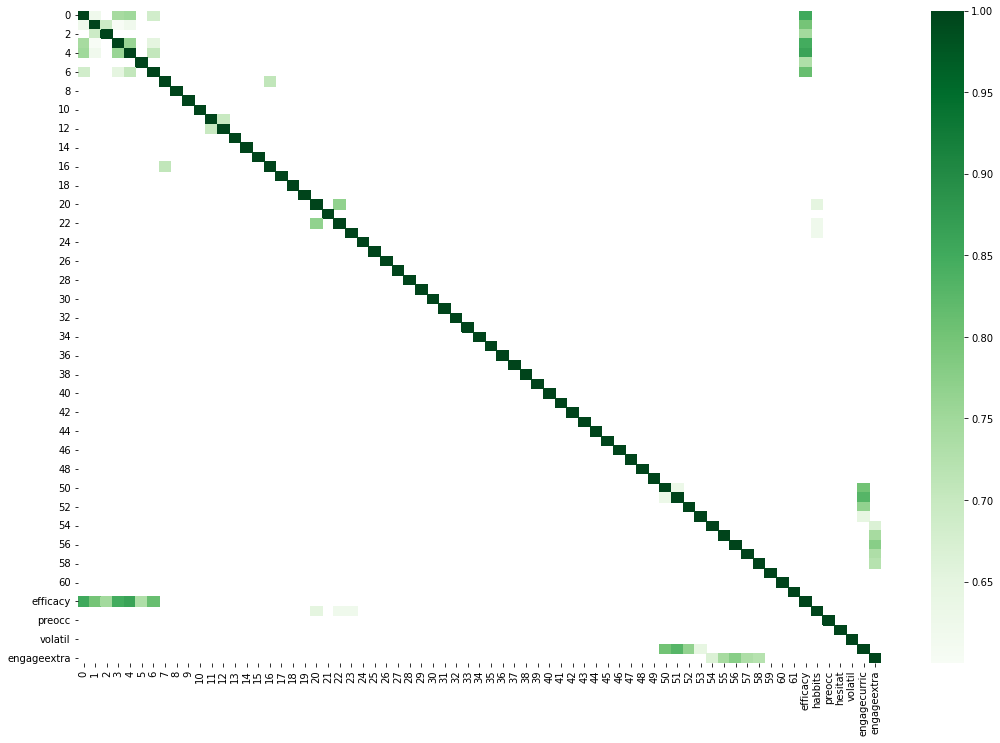

In [31]:
cormat = DF4_ALL.corr()
round(cormat,2)
import seaborn as sns
kot = cormat[cormat>=.6]
plt.figure(figsize=(18,12))
sns.heatmap(kot, cmap="Greens")

In [32]:
DF4FreJeoPost.iloc[:,61]

0      3.40
1      3.79
2      3.40
3      2.50
4      3.40
       ... 
426    3.00
427    3.40
428    3.93
429    3.99
430    3.00
Name: 61, Length: 431, dtype: float64

In [33]:
GPAFreJeoPost = DF4FreJeoPost.iloc[:,61]
DF4FreJeoPost.drop(DF4FreJeoPost.columns[61], axis=1, inplace=True)
DF4FreJeoPost.columns = range(DF4FreJeoPost.columns.size) # re index column numbers
# to get numbers > k
count2 = sum(i < 2 for i in GPAFreJeoPost)
count25 = sum(i < 2.5 for i in GPAFreJeoPost)
count3 = sum(i < 3 for i in GPAFreJeoPost)
count4 = sum(i <= 4 for i in GPAFreJeoPost)
# printing the intersection 
print(f'Out of {len(GPAFreJeoPost)} students, GPAFreJeoPost < 2: {count2}, GPAFreJeoPost < 2.5: {count25}, GPAFreJeoPost < 3: {count3}, GPAFreJeoPost <= 4: {count4}')
fig = px.histogram(GPAFreJeoPost, nbins=6)
fig.show()

Out of 431 students, GPAFreJeoPost < 2: 3, GPAFreJeoPost < 2.5: 11, GPAFreJeoPost < 3: 75, GPAFreJeoPost < 4: 427


In [34]:
GPAFreJeoPre = DF4FreJeoPre.iloc[:,61]
DF4FreJeoPre.drop(DF4FreJeoPre.columns[61], axis=1, inplace=True)
DF4FreJeoPre.columns = range(DF4FreJeoPre.columns.size) # re index column numbers
# to get numbers > k
count2 = sum(i < 2 for i in GPAFreJeoPre)
count25 = sum(i < 2.5 for i in GPAFreJeoPre)
count3 = sum(i < 3 for i in GPAFreJeoPre)
count4 = sum(i <= 4 for i in GPAFreJeoPre)
# printing the intersection 
print(f'Out of {len(GPAFreJeoPre)} students, GPAFreJeoPre < 2: {count2}, GPAFreJeoPre < 2.5: {count25}, GPAFreJeoPre < 3: {count3}, GPAFreJeoPre <= 4: {count4}')

fig = px.histogram(GPAFreJeoPre, nbins=6)
fig.show()

Out of 484 students, GPAFreJeoPre < 2: 3, GPAFreJeoPre < 2.5: 12, GPAFreJeoPre < 3: 98, GPAFreJeoPre <= 4: 484


In [35]:
GPAOld = DF4Old.iloc[:,61]
DF4Old.drop(DF4Old.columns[61], axis=1, inplace=True)
DF4Old.columns = range(DF4Old.columns.size) # re index column numbers
# to get numbers > k
count2 = sum(i < 2 for i in GPAOld)
count25 = sum(i < 2.5 for i in GPAOld)
count3 = sum(i < 3 for i in GPAOld)
count4 = sum(i <= 4 for i in GPAOld)
# printing the intersection 
print(f'Out of {len(GPAOld)} students, GPAOld < 2: {count2}, GPAOld < 2.5: {count25}, GPAOld < 3: {count3}, GPAOld <= 4: {count4}')
fig = px.histogram(GPAOld, nbins=6)
fig.show()

Out of 2592 students, GPAOld < 2: 16, GPAOld < 2.5: 79, GPAOld < 3: 312, GPAOld <= 4: 2592


In [36]:
GPAALL = DF4_ALL.iloc[:,61]
DF4_ALL.drop(DF4_ALL.columns[61], axis=1, inplace=True)
DF4_ALL.columns = range(DF4_ALL.columns.size) # re index column numbers
# to get numbers > k
count2 = sum(i < 2 for i in GPAALL)
count25 = sum(i < 2.5 for i in GPAALL)
count3 = sum(i < 3 for i in GPAALL)
count4 = sum(i <= 4 for i in GPAALL)
# printing the intersection 
print(f'Out of {len(GPAALL)} students, GPAALL < 2: {count2}, GPAALL < 2.5: {count25}, GPAALL < 3: {count3}, GPAALL < 4: {count4}')

fig = px.histogram(GPAALL, nbins=6)
fig.show()

Out of 7664 students, GPAALL < 2: 43, GPAALL < 2.5: 230, GPAALL < 3: 1021, GPAALL < 4: 7664


SCALE DATA USING MINMAXSCALER

In [37]:
cols = DF4_ALL.columns
scaler = MinMaxScaler()
DF4_ALL_Scaled = pd.DataFrame(scaler.fit_transform(DF4_ALL), columns=cols)

# GPAmax = GPA.max()
# GPAmin = GPA.min()
# GPAreshaped = GPA.values.reshape(-1, 1) 
# GPAScaled = pd.DataFrame(scaler.fit_transform(GPAreshaped))
# GPAScaled2 = (GPA - GPA.min()) / (GPA.max() - GPA.min())

#DF5ALL = pd.concat([DF4_ALL_Scaled, GPAALL], axis = 1)
#DF5ALL.columns = range(DF5ALL.columns.size) # re index column numbers

DF4_ALL_QO = DF4_ALL.iloc[:,0:61]
DF4_ALL_QO.shape

cols = DF4_ALL_QO.columns
scaler2 = MinMaxScaler()
DF4_ALL_QO_Scaled = pd.DataFrame(scaler2.fit_transform(DF4_ALL_QO), columns=cols)

In [38]:
cols = DF4FreJeoPost.columns
scaler5 = MinMaxScaler()
DF4FreJeoPost_Scaled = pd.DataFrame(scaler5.fit_transform(DF4FreJeoPost), columns=cols)

# GPAmax = GPA.max()
# GPAmin = GPA.min()
# GPAreshaped = GPA.values.reshape(-1, 1) 
# GPAScaled = pd.DataFrame(scaler.fit_transform(GPAreshaped))
# GPAScaled2 = (GPA - GPA.min()) / (GPA.max() - GPA.min())

#DF5FreJeoPost = pd.concat([DF4FreJeoPost_Scaled, GPAFreJeoPost], axis = 1)
#DF5FreJeoPost.columns = range(DF5FreJeoPost.columns.size) # re index column numbers

DF4FreJeoPost_QO = DF4FreJeoPost.iloc[:,0:61]
DF4FreJeoPost_QO.shape

cols = DF4FreJeoPost_QO.columns
scaler6 = MinMaxScaler()
DF4FreJeoPost_QO_Scaled = pd.DataFrame(scaler6.fit_transform(DF4FreJeoPost_QO), columns=cols)

In [39]:
cols = DF4FreJeoPre.columns
scaler7 = MinMaxScaler()
DF4FreJeoPre_Scaled = pd.DataFrame(scaler7.fit_transform(DF4FreJeoPre), columns=cols)

# GPAmax = GPA.max()
# GPAmin = GPA.min()
# GPAreshaped = GPA.values.reshape(-1, 1) 
# GPAScaled = pd.DataFrame(scaler.fit_transform(GPAreshaped))
# GPAScaled2 = (GPA - GPA.min()) / (GPA.max() - GPA.min())

#DF5FreJeoPre = pd.concat([DF4FreJeoPre_Scaled, GPAFreJeoPre], axis = 1)
#DF5FreJeoPre.columns = range(DF5FreJeoPre.columns.size) # re index column numbers

DF4FreJeoPre_QO = DF4FreJeoPre.iloc[:,0:61]
DF4FreJeoPre_QO.shape

cols = DF4FreJeoPre_QO.columns
scaler8 = MinMaxScaler()
DF4FreJeoPre_QO_Scaled = pd.DataFrame(scaler8.fit_transform(DF4FreJeoPre_QO), columns=cols)

**FREKIDES PRE**_OCSVM USING _**FULL DATASET**_TH2 / ADDITIONAL FUNCTIONS REMOVED, QUESTIONS ONLY

In [ ]:
from sklearn.svm import OneClassSVM
SVMOC = OneClassSVM(gamma='scale', nu=0.03, kernel = 'rbf', verbose=True)
# if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
# if gamma= ‘auto’, uses 1 / n_features.
# print(SVMOC)

SVMOC.fit(DF4FreJeoPre_QO_Scaled)
OCsvmresults = SVMOC.predict(DF4FreJeoPre_QO_Scaled)

TH = 3.0
GPAFreJeoPre_Cat = np.where((GPAFreJeoPre <= 4) & (GPAFreJeoPre >= TH), 1, GPAFreJeoPre)
GPAFreJeoPre_Cat = np.where((GPAFreJeoPre < TH) & (GPAFreJeoPre >= 1.0), -1, GPAFreJeoPre_Cat)

GPAFreJeoPost_Cat = np.where((GPAFreJeoPost <= 4) & (GPAFreJeoPost >= TH), 1, GPAFreJeoPost)
GPAFreJeoPost_Cat = np.where((GPAFreJeoPost < TH) & (GPAFreJeoPost >= 1.0), -1, GPAFreJeoPost_Cat)

#print('OCSVM returns -1 for anomalies, 1 for nominals')
#print(f'Number of students predicted to be above threshold {TH} is .. {count(np.where(OCsvmresults == 1))}')
#print(f'Number of students predicted to be below threshold {TH} is .. {count(np.where(OCsvmresults == -1))}')
#print('********************************************************************************')

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
#micro = f1_score(GPA_Cat, OCsvmresults, average='micro')
#macro = f1_score(GPA_Cat, OCsvmresults, average='macro')
#none = f1_score(GPA_Cat, OCsvmresults, average=None)
#weighted = f1_score(GPA_Cat, OCsvmresults, average='weighted')
#print(f'The comb tryout number: {i}')
#print(f'F1 Score using micro avarage = {micro}')
#print(f'F1 Score using macro avarage = {macro}')
#print(f'F1 Score using no avarage = {none}')
#print(f'F1 Score using weighted avarage = {weighted}')
#print('********************************************************************************')
#print(f'Number of instances that were predicted correctly {count(np.where(OCsvmresults * GPA_Cat == 1))}')
#print(f'Number of instances that were not predicted correctly {count(np.where(OCsvmresults * GPA_Cat == -1))}')
#print(f'Instances that are true negative {count(np.where(OCsvmresults + GPA_Cat == -2))}')
#print(f'Instances that are true positive {count(np.where(OCsvmresults + GPA_Cat == 2))}')
#print('********************************************************************************')
#decision calculated to use in roc 
OCsvmscoresPre = SVMOC.decision_function(DF4FreJeoPre_QO_Scaled)
fpr5,tpr5,thresholds = roc_curve(GPAFreJeoPre_Cat,OCsvmscoresPre)

OCsvmscoresPost = SVMOC.decision_function(DF4FreJeoPost_QO_Scaled)
fpr6,tpr6,thresholds2 = roc_curve(GPAFreJeoPost_Cat,OCsvmscoresPost)

roc_auc5 = metrics.auc(fpr5,tpr5)
roc_auc6 = metrics.auc(fpr6,tpr6)
print(f'The AUC Score for Frekides PRE Components ----- {roc_auc5}')
print(f'The AUC Score for Frekides POST Components ----- {roc_auc6}')
print('*****************************************************************************************************************************************')


# plt.figure()
# plt.plot(fpr5, tpr5, label='ROC curve (area = %0.2f)' % roc_auc5)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.show()

# #OCSVM returns -1 for anomalies, 1 for nominals
# np.where(OCsvmresults == -1)
# #OCSVM returns -1 for anomalies, 1 for nominals
# np.where(GPA_Cat == -1)
########################################################################
my_dict = {"Combinations":[],"AUC_Pre_On_PreNN":[],"AUC_Post_On_PreNN":[]};

my_dict["Combinations"].append("PreNNPre vs PreNNPost - ALL Features")
my_dict["AUC_Pre_On_PreNN"].append(roc_auc5)
my_dict["AUC_Post_On_PreNN"].append(roc_auc6)

DFmy_dict = pd.DataFrame(my_dict)
DFmy_dict = DFmy_dict.sort_values(by='AUC_Pre_On_PreNN', ascending=False)

DFmy_dict.to_csv('DFmy_dict.csv')
from google.colab import files
files.download("DFmy_dict.csv")

[LibSVM]The AUC Score for Frekides PRE Components ----- 0.507243311832505
The AUC Score for Frekides POST Components ----- 0.43089887640449437
*****************************************************************************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**ALL DATA**_OCSVM USING _**FULL DATASET**_TH2.5 / ADDITIONAL FUNCTIONS REMOVED, QUESTIONS ONLY

In [ ]:
from sklearn.svm import OneClassSVM
SVMOC = OneClassSVM(gamma='scale', nu=0.03, kernel = 'rbf', verbose=True)
# if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
# if gamma= ‘auto’, uses 1 / n_features.
# print(SVMOC)

SVMOC.fit(DF4_ALL_QO_Scaled)
OCsvmresults = SVMOC.predict(DF4_ALL_QO_Scaled)

TH = 2.5
GPAALL_Cat = np.where((GPAALL <= 4) & (GPAALL >= TH), 1, GPAALL)
GPAALL_Cat = np.where((GPAALL < TH) & (GPAALL >= 0), -1, GPAALL_Cat)

#print('OCSVM returns -1 for anomalies, 1 for nominals')
#print(f'Number of students predicted to be above threshold {TH} is .. {count(np.where(OCsvmresults == 1))}')
#print(f'Number of students predicted to be below threshold {TH} is .. {count(np.where(OCsvmresults == -1))}')
#print('********************************************************************************')

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
#micro = f1_score(GPA_Cat, OCsvmresults, average='micro')
#macro = f1_score(GPA_Cat, OCsvmresults, average='macro')
#none = f1_score(GPA_Cat, OCsvmresults, average=None)
#weighted = f1_score(GPA_Cat, OCsvmresults, average='weighted')
#print(f'The comb tryout number: {i}')
#print(f'F1 Score using micro avarage = {micro}')
#print(f'F1 Score using macro avarage = {macro}')
#print(f'F1 Score using no avarage = {none}')
#print(f'F1 Score using weighted avarage = {weighted}')
#print('********************************************************************************')
#print(f'Number of instances that were predicted correctly {count(np.where(OCsvmresults * GPA_Cat == 1))}')
#print(f'Number of instances that were not predicted correctly {count(np.where(OCsvmresults * GPA_Cat == -1))}')
#print(f'Instances that are true negative {count(np.where(OCsvmresults + GPA_Cat == -2))}')
#print(f'Instances that are true positive {count(np.where(OCsvmresults + GPA_Cat == 2))}')
#print('********************************************************************************')
#decision calculated to use in roc 
OCsvmscores = SVMOC.decision_function(DF4_ALL_QO_Scaled)

fpr5,tpr5,thresholds = roc_curve(GPAALL_Cat,OCsvmscores)
roc_auc5 = metrics.auc(fpr5,tpr5)
print(f'The AUC Score for Questions Principal Components ----- {roc_auc5}')
print('*****************************************************************************************************************************************')


# plt.figure()
# plt.plot(fpr5, tpr5, label='ROC curve (area = %0.2f)' % roc_auc5)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.show()

# #OCSVM returns -1 for anomalies, 1 for nominals
# np.where(OCsvmresults == -1)
# #OCSVM returns -1 for anomalies, 1 for nominals
# np.where(GPA_Cat == -1)
########################################################################
my_dict = {"Combinations":[],"AUCScores":[]};

my_dict["Combinations"].append("Biodeg Scaled ALL Features")
my_dict["AUCScores"].append(roc_auc5)

DFmy_dict = pd.DataFrame(my_dict)
DFmy_dict = DFmy_dict.sort_values(by='AUCScores', ascending=False)

DFmy_dict.to_csv('DFmy_dict.csv')
from google.colab import files
files.download("DFmy_dict.csv")

[LibSVM]The AUC Score for Questions Principal Components ----- 0.5191212461489736
*****************************************************************************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**FREKIDES DATA** GPA THRESHOLD AT 2/2.5/3 QUESTIONS ONLY **RANDOM 18** OCSVM

In [ ]:
from sklearn.svm import OneClassSVM
from numpy.ma.core import count

DF4FreJeoPre_Scaled_Rand18 = DF4FreJeoPre_QO_Scaled.sample(n=18,axis='columns')
Comb1 = DF4FreJeoPre_Scaled_Rand18.columns.values.tolist()

DF4FreJeoPost_Corresponding_to_Pre_Scaled_Rand18 = DF4FreJeoPost_QO_Scaled.iloc[: , Comb1].copy()

Questions = ' '.join(str(e) for e in Comb1)
DF5 = pd.concat([DF4FreJeoPre_Scaled_Rand18, GPAFreJeoPre], axis = 1)

########################################################################
TH = 3
GPAFreJeoPre_Cat = np.where((GPAFreJeoPre <= 4) & (GPAFreJeoPre >= TH), 1, GPAFreJeoPre)
GPAFreJeoPre_Cat = np.where((GPAFreJeoPre < TH) & (GPAFreJeoPre >= 1.0), -1, GPAFreJeoPre_Cat)

GPAFreJeoPost_Cat = np.where((GPAFreJeoPost <= 4) & (GPAFreJeoPost >= TH), 1, GPAFreJeoPost)
GPAFreJeoPost_Cat = np.where((GPAFreJeoPost < TH) & (GPAFreJeoPost >= 1.0), -1, GPAFreJeoPost_Cat)

print(f'Threshold is {TH}')
print(f'Actual number of students above threshold {TH} is .. {count(np.where(GPAFreJeoPre_Cat == 1))}')
print(f'Actual number of students below threshold {TH} is .. {count(np.where(GPAFreJeoPre_Cat == -1))}')
print('********************************************************************************')

my_dict = {"Combinations":[],"AUCScoresPre":[],"AUCScoresPost":[]};

for i in range(20000):

  DF4FreJeoPre_Scaled_Rand18 = DF4FreJeoPre_QO_Scaled.sample(n=18,axis='columns')
  Comb1 = DF4FreJeoPre_Scaled_Rand18.columns.values.tolist()
  Questions = ' '.join(str(e) for e in Comb1)

  DF4FreJeoPost_Corresponding_to_Pre_Scaled_Rand18 = DF4FreJeoPost_QO_Scaled.iloc[: , Comb1].copy()

  SVMOC = OneClassSVM(gamma='scale', nu=0.03, kernel = 'rbf', verbose=True)
  # if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
  # if gamma= ‘auto’, uses 1 / n_features.
  # print(SVMOC)

  SVMOC.fit(DF4FreJeoPre_Scaled_Rand18)
  OCsvmresultsPre = SVMOC.predict(DF4FreJeoPre_Scaled_Rand18)

  #print('OCSVM returns -1 for anomalies, 1 for nominals')
  #print(f'Number of students predicted to be above threshold {TH} is .. {count(np.where(OCsvmresults == 1))}')
  #print(f'Number of students predicted to be below threshold {TH} is .. {count(np.where(OCsvmresults == -1))}')
  #print('********************************************************************************')

  from sklearn.metrics import f1_score
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  from sklearn import metrics
  micro = f1_score(GPAFreJeoPre_Cat, OCsvmresultsPre, average='micro')
  macro = f1_score(GPAFreJeoPre_Cat, OCsvmresultsPre, average='macro')
  none = f1_score(GPAFreJeoPre_Cat, OCsvmresultsPre, average=None)
  weighted = f1_score(GPAFreJeoPre_Cat, OCsvmresultsPre, average='weighted')
  #print(f'The comb tryout number: {i}')
  #print(f'F1 Score using micro avarage = {micro}')
  #print(f'F1 Score using macro avarage = {macro}')
  #print(f'F1 Score using no avarage = {none}')
  #print(f'F1 Score using weighted avarage = {weighted}')
  #print('********************************************************************************')
  #print(f'Number of instances that were predicted correctly {count(np.where(OCsvmresults * GPA_Cat == 1))}')
  #print(f'Number of instances that were not predicted correctly {count(np.where(OCsvmresults * GPA_Cat == -1))}')
  #print(f'Instances that are true negative {count(np.where(OCsvmresults + GPA_Cat == -2))}')
  #print(f'Instances that are true positive {count(np.where(OCsvmresults + GPA_Cat == 2))}')
  #print('********************************************************************************')
  #decision calculated to use in roc 
  OCsvmscoresPre = SVMOC.decision_function(DF4FreJeoPre_Scaled_Rand18)
  fpr5,tpr5,thresholds = roc_curve(GPAFreJeoPre_Cat,OCsvmscoresPre)
  roc_auc5 = metrics.auc(fpr5,tpr5)

  OCsvmscoresPost = SVMOC.decision_function(DF4FreJeoPost_Corresponding_to_Pre_Scaled_Rand18)
  fpr6,tpr6,thresholds2 = roc_curve(GPAFreJeoPost_Cat,OCsvmscoresPost)
  roc_auc6 = metrics.auc(fpr6,tpr6)
  #print(f'The AUC Score for Questions {Comb1} ----- {roc_auc5}')
  #print('*****************************************************************************************************************************************')
  
  
  # plt.figure()
  # plt.plot(fpr5, tpr5, label='ROC curve (area = %0.2f)' % roc_auc5)
  # plt.plot([0, 1], [0, 1], 'k--')
  # plt.xlim([0.0, 1.0])
  # plt.ylim([0.0, 1.05])
  # plt.xlabel('False Positive Rate')
  # plt.ylabel('True Positive Rate')
  # plt.title('Receiver operating characteristic')
  # plt.legend(loc="lower right")
  # plt.show()

  # #OCSVM returns -1 for anomalies, 1 for nominals
  # np.where(OCsvmresults == -1)
  # #OCSVM returns -1 for anomalies, 1 for nominals
  # np.where(GPA_Cat == -1)
########################################################################


  my_dict["Combinations"].append(Comb1)
  my_dict["AUCScoresPre"].append(roc_auc5)
  my_dict["AUCScoresPost"].append(roc_auc6)

DFmy_dict = pd.DataFrame(my_dict)
DFmy_dict = DFmy_dict.sort_values(by='AUCScoresPre', ascending=False)

DFmy_dict.head(10)

DFmy_dict.to_csv('DFmy_dict.csv')
from google.colab import files
files.download("DFmy_dict.csv")

Threshold is 3
Actual number of students above threshold 3 is .. 315
Actual number of students below threshold 3 is .. 84
********************************************************************************
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(f'Avarage of top 100 AUC scores is = {sum(DFmy_dict["AUCScoresPre"][:100])/100}')
print(f'Avarage of top 1000 AUC scores is = {sum(DFmy_dict["AUCScoresPre"][:1000])/1000}')
print(f'Avarage of AUC scores is = {sum(DFmy_dict["AUCScoresPre"])/len(DFmy_dict["AUCScoresPre"])}')
DFmy_dict.head(3)

Avarage of top 100 AUC scores is = 0.5834678760393046
Avarage of top 1000 AUC scores is = 0.5662982615268344
Avarage of AUC scores is = 0.5214175160619766


,Combinations,AUCScoresPre,AUCScoresPost
4603,"[52, 5, 47, 46, 39, 48, 53, 55, 19, 51, 6, 50,...",0.609902,0.661076
7179,"[60, 58, 30, 41, 2, 4, 57, 44, 38, 52, 48, 49,...",0.603741,0.553878
8542,"[33, 57, 48, 19, 46, 53, 36, 58, 4, 43, 31, 49...",0.599735,0.565668


**OLD DATA** GPA THRESHOLD AT 2.5 QUESTIONS ONLY **RANDOM 18** OCSVM

In [ ]:
from sklearn.svm import OneClassSVM
from numpy.ma.core import count

DF4_ALL_Scaled_Rand18 = DF4_ALL_QO_Scaled.sample(n=18,axis='columns')
Comb1 = DF4_ALL_Scaled_Rand18.columns.values.tolist()

Questions = ' '.join(str(e) for e in Comb1)
DF5 = pd.concat([DF4_ALL_Scaled_Rand18, GPAALL], axis = 1)

########################################################################
TH = 2.5
GPAALL_Cat = np.where((GPAALL <= 4) & (GPAALL >= TH), 1, GPAALL)
GPAALL_Cat = np.where((GPAALL < TH) & (GPAALL >= 1.0), -1, GPAALL_Cat)
print(f'Threshold is {TH}')
print(f'Actual number of students above threshold {TH} is .. {count(np.where(GPAALL_Cat == 1))}')
print(f'Actual number of students below threshold {TH} is .. {count(np.where(GPAALL_Cat == -1))}')
print('********************************************************************************')

my_dict = {"Combinations":[],"AUCScores":[]};

for i in range(20000):

  DF4_ALL_Scaled_Rand18 = DF4_ALL_QO_Scaled.sample(n=18,axis='columns')
  Comb1 = DF4_ALL_Scaled_Rand18.columns.values.tolist()
  Questions = ' '.join(str(e) for e in Comb1)

  SVMOC = OneClassSVM(gamma='scale', nu=0.03, kernel = 'rbf', verbose=True)
  # if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
  # if gamma= ‘auto’, uses 1 / n_features.
  # print(SVMOC)

  SVMOC.fit(DF4_ALL_Scaled_Rand18)
  OCsvmresults = SVMOC.predict(DF4_ALL_Scaled_Rand18)

  #print('OCSVM returns -1 for anomalies, 1 for nominals')
  #print(f'Number of students predicted to be above threshold {TH} is .. {count(np.where(OCsvmresults == 1))}')
  #print(f'Number of students predicted to be below threshold {TH} is .. {count(np.where(OCsvmresults == -1))}')
  #print('********************************************************************************')

  from sklearn.metrics import f1_score
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  from sklearn import metrics
  micro = f1_score(GPAALL_Cat, OCsvmresults, average='micro')
  macro = f1_score(GPAALL_Cat, OCsvmresults, average='macro')
  none = f1_score(GPAALL_Cat, OCsvmresults, average=None)
  weighted = f1_score(GPAALL_Cat, OCsvmresults, average='weighted')
  #print(f'The comb tryout number: {i}')
  #print(f'F1 Score using micro avarage = {micro}')
  #print(f'F1 Score using macro avarage = {macro}')
  #print(f'F1 Score using no avarage = {none}')
  #print(f'F1 Score using weighted avarage = {weighted}')
  #print('********************************************************************************')
  #print(f'Number of instances that were predicted correctly {count(np.where(OCsvmresults * GPA_Cat == 1))}')
  #print(f'Number of instances that were not predicted correctly {count(np.where(OCsvmresults * GPA_Cat == -1))}')
  #print(f'Instances that are true negative {count(np.where(OCsvmresults + GPA_Cat == -2))}')
  #print(f'Instances that are true positive {count(np.where(OCsvmresults + GPA_Cat == 2))}')
  #print('********************************************************************************')
  #decision calculated to use in roc 
  OCsvmscores = SVMOC.decision_function(DF4_ALL_Scaled_Rand18)

  fpr5,tpr5,thresholds = roc_curve(GPAALL_Cat,OCsvmscores)
  roc_auc5 = metrics.auc(fpr5,tpr5)
  #print(f'The AUC Score for Questions {Comb1} ----- {roc_auc5}')
  #print('*****************************************************************************************************************************************')
  
  
  # plt.figure()
  # plt.plot(fpr5, tpr5, label='ROC curve (area = %0.2f)' % roc_auc5)
  # plt.plot([0, 1], [0, 1], 'k--')
  # plt.xlim([0.0, 1.0])
  # plt.ylim([0.0, 1.05])
  # plt.xlabel('False Positive Rate')
  # plt.ylabel('True Positive Rate')
  # plt.title('Receiver operating characteristic')
  # plt.legend(loc="lower right")
  # plt.show()

  # #OCSVM returns -1 for anomalies, 1 for nominals
  # np.where(OCsvmresults == -1)
  # #OCSVM returns -1 for anomalies, 1 for nominals
  # np.where(GPA_Cat == -1)
########################################################################


  my_dict["Combinations"].append(Comb1)
  my_dict["AUCScores"].append(roc_auc5)

DFmy_dict = pd.DataFrame(my_dict)
DFmy_dict = DFmy_dict.sort_values(by='AUCScores', ascending=False)

DFmy_dict.head(10)

DFmy_dict.to_csv('DFmy_dict.csv')
from google.colab import files
files.download("DFmy_dict.csv")

Threshold is 2.5
Actual number of students above threshold 2.5 is .. 2513
Actual number of students below threshold 2.5 is .. 79
********************************************************************************
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSV

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(f'Avarage of top 100 AUC scores is = {sum(DFmy_dict["AUCScores"][:100])/100}')
print(f'Avarage of top 1000 AUC scores is = {sum(DFmy_dict["AUCScores"][:1000])/1000}')
print(f'Avarage of AUC scores is = {sum(DFmy_dict["AUCScores"])/len(DFmy_dict["AUCScores"])}')
DFmy_dict.head(3)

Avarage of top 100 AUC scores is = 0.6049348703199061
Avarage of top 1000 AUC scores is = 0.5841036080734605
Avarage of AUC scores is = 0.5321472836188533


,Combinations,AUCScores
13388,"[22, 8, 50, 3, 59, 39, 11, 56, 45, 42, 1, 47, ...",0.634317
13213,"[57, 33, 53, 46, 32, 60, 59, 40, 25, 50, 0, 42...",0.632644
17574,"[19, 59, 45, 16, 11, 3, 39, 60, 36, 49, 33, 47...",0.630242


**FREKIDES** GPA THRESHOLD AT 2/2.5/3 QUESTIONS ONLY **RANDOM 18** OCSVM **UPDATE SAMPLING WEIGHTS SOMEHOW**

In [ ]:
from sklearn.svm import OneClassSVM
from numpy.ma.core import count

weightage = [1/61 for i in range(61)]

DF4FreJeoPre_Scaled_Rand18 = DF4FreJeoPre_QO_Scaled.sample(n=18,axis='columns',weights=weightage)
Comb1 = DF4FreJeoPre_Scaled_Rand18.columns.values.tolist()

DF4FreJeoPost_Corresponding_to_Pre_Scaled_Rand18 = DF4FreJeoPost_QO_Scaled.iloc[: , Comb1].copy()

Questions = ' '.join(str(e) for e in Comb1)
DF5 = pd.concat([DF4FreJeoPre_Scaled_Rand18, GPAFreJeoPre], axis = 1)

########################################################################
TH = 3
GPAFreJeoPre_Cat = np.where((GPAFreJeoPre <= 4) & (GPAFreJeoPre >= TH), 1, GPAFreJeoPre)
GPAFreJeoPre_Cat = np.where((GPAFreJeoPre < TH) & (GPAFreJeoPre >= 1.0), -1, GPAFreJeoPre_Cat)

GPAFreJeoPost_Cat = np.where((GPAFreJeoPost <= 4) & (GPAFreJeoPost >= TH), 1, GPAFreJeoPost)
GPAFreJeoPost_Cat = np.where((GPAFreJeoPost < TH) & (GPAFreJeoPost >= 1.0), -1, GPAFreJeoPost_Cat)

print(f'Threshold is {TH}')
print(f'Actual number of students above threshold {TH} is .. {count(np.where(GPAFreJeoPre == 1))}')
print(f'Actual number of students below threshold {TH} is .. {count(np.where(GPAFreJeoPre == -1))}')
print('********************************************************************************')

my_dict = {"Combinations":[],"AUCScoresPre":[],"AUCScoresPost":[]};

for i in range(5000):

  DF4FreJeoPre_Scaled_Rand18 = DF4FreJeoPre_QO_Scaled.sample(n=18,axis='columns',weights=weightage)
  Comb1 = DF4FreJeoPre_Scaled_Rand18.columns.values.tolist()
  Questions = ' '.join(str(e) for e in Comb1)

  DF4FreJeoPost_Corresponding_to_Pre_Scaled_Rand18 = DF4FreJeoPost_QO_Scaled.iloc[: , Comb1].copy()

  SVMOC = OneClassSVM(gamma='scale', nu=0.03, kernel = 'rbf', verbose=True)
  # if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
  # if gamma= ‘auto’, uses 1 / n_features.
  # print(SVMOC)

  SVMOC.fit(DF4FreJeoPre_Scaled_Rand18)
  OCsvmresults = SVMOC.predict(DF4FreJeoPre_Scaled_Rand18)

  #print('OCSVM returns -1 for anomalies, 1 for nominals')
  #print(f'Number of students predicted to be above threshold {TH} is .. {count(np.where(OCsvmresults == 1))}')
  #print(f'Number of students predicted to be below threshold {TH} is .. {count(np.where(OCsvmresults == -1))}')
  #print('********************************************************************************')

  from sklearn.metrics import f1_score
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  from sklearn import metrics
  micro = f1_score(GPAFreJeoPre_Cat, OCsvmresults, average='micro')
  macro = f1_score(GPAFreJeoPre_Cat, OCsvmresults, average='macro')
  none = f1_score(GPAFreJeoPre_Cat, OCsvmresults, average=None)
  weighted = f1_score(GPAFreJeoPre_Cat, OCsvmresults, average='weighted')
  #print(f'The comb tryout number: {i}')
  #print(f'F1 Score using micro avarage = {micro}')
  #print(f'F1 Score using macro avarage = {macro}')
  #print(f'F1 Score using no avarage = {none}')
  #print(f'F1 Score using weighted avarage = {weighted}')
  #print('********************************************************************************')
  #print(f'Number of instances that were predicted correctly {count(np.where(OCsvmresults * GPA_Cat == 1))}')
  #print(f'Number of instances that were not predicted correctly {count(np.where(OCsvmresults * GPA_Cat == -1))}')
  #print(f'Instances that are true negative {count(np.where(OCsvmresults + GPA_Cat == -2))}')
  #print(f'Instances that are true positive {count(np.where(OCsvmresults + GPA_Cat == 2))}')
  #print('********************************************************************************')
  #decision calculated to use in roc 
  OCsvmscoresPre = SVMOC.decision_function(DF4FreJeoPre_Scaled_Rand18)
  fpr5,tpr5,thresholds = roc_curve(GPAFreJeoPre_Cat,OCsvmscoresPre)
  roc_auc5 = metrics.auc(fpr5,tpr5)

  OCsvmscoresPost = SVMOC.decision_function(DF4FreJeoPost_Corresponding_to_Pre_Scaled_Rand18)
  fpr6,tpr6,thresholds2 = roc_curve(GPAFreJeoPost_Cat,OCsvmscoresPost)
  roc_auc6 = metrics.auc(fpr6,tpr6)
  #print(f'The AUC Score for Questions {Comb1} ----- {roc_auc5}')
  #print('*****************************************************************************************************************************************')
  
  
  # plt.figure()
  # plt.plot(fpr5, tpr5, label='ROC curve (area = %0.2f)' % roc_auc5)
  # plt.plot([0, 1], [0, 1], 'k--')
  # plt.xlim([0.0, 1.0])
  # plt.ylim([0.0, 1.05])
  # plt.xlabel('False Positive Rate')
  # plt.ylabel('True Positive Rate')
  # plt.title('Receiver operating characteristic')
  # plt.legend(loc="lower right")
  # plt.show()

  # #OCSVM returns -1 for anomalies, 1 for nominals
  # np.where(OCsvmresults == -1)
  # #OCSVM returns -1 for anomalies, 1 for nominals
  # np.where(GPA_Cat == -1)
########################################################################


  my_dict["Combinations"].append(Comb1)
  my_dict["AUCScoresPre"].append(roc_auc5)
  my_dict["AUCScoresPost"].append(roc_auc6)

  for i in Comb1:
    weightage[i] = weightage[i] + (0.01 * (roc_auc5 - (sum(my_dict["AUCScoresPre"])/len(my_dict["AUCScoresPre"]))))


DFmy_dict = pd.DataFrame(my_dict)
DFmy_dict = DFmy_dict.sort_values(by='AUCScoresPre', ascending=False)

DFmy_dict.head(10)

DFmy_dict.to_csv('DFmy_dict.csv')
from google.colab import files
files.download("DFmy_dict.csv")

Threshold is 3
Actual number of students above threshold 3 is .. 0
Actual number of students below threshold 3 is .. 0
********************************************************************************
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(f'Avarage of top 100 AUC scores is = {sum(DFmy_dict["AUCScoresPre"][:100])/100}')
print(f'Avarage of top 1000 AUC scores is = {sum(DFmy_dict["AUCScoresPre"][:1000])/1000}')
print(f'Avarage of AUC scores is = {sum(DFmy_dict["AUCScoresPre"])/len(DFmy_dict["AUCScoresPre"])}')
DFmy_dict.head(3)

Avarage of top 100 AUC scores is = 0.6059274376417234
Avarage of top 1000 AUC scores is = 0.5891319160997726
Avarage of AUC scores is = 0.5600638435374158


,Combinations,AUCScoresPre,AUCScoresPost
3925,"[50, 4, 60, 57, 49, 5, 24, 53, 39, 51, 22, 42,...",0.619010,0.729096
4740,"[42, 7, 21, 29, 24, 6, 51, 53, 15, 46, 3, 48, ...",0.615873,0.726620
2197,"[38, 60, 57, 24, 40, 42, 34, 35, 51, 41, 15, 5...",0.615533,0.700749


**OLD DATA** GPA THRESHOLD AT 2.5 QUESTIONS ONLY **RANDOM 18** OCSVM **UPDATE SAMPLING WEIGHTS SOMEHOW**

In [ ]:
from sklearn.svm import OneClassSVM
from numpy.ma.core import count

weightage = [1/61 for i in range(61)]

DF4_ALL_Scaled_Rand18 = DF4_ALL_QO_Scaled.sample(n=18,axis='columns',weights=weightage)
Comb1 = DF4_ALL_Scaled_Rand18.columns.values.tolist()

Questions = ' '.join(str(e) for e in Comb1)
DF5 = pd.concat([DF4_ALL_Scaled_Rand18, GPAALL], axis = 1)

########################################################################
TH = 2.5
GPAALL_Cat = np.where((GPAALL <= 4) & (GPAALL >= TH), 1, GPAALL)
GPAALL_Cat = np.where((GPAALL < TH) & (GPAALL >= 1.0), -1, GPAALL_Cat)
print(f'Threshold is {TH}')
print(f'Actual number of students above threshold {TH} is .. {count(np.where(GPAALL_Cat == 1))}')
print(f'Actual number of students below threshold {TH} is .. {count(np.where(GPAALL_Cat == -1))}')
print('********************************************************************************')

my_dict = {"Combinations":[],"AUCScores":[]};

for i in range(5000):

  DF4_ALL_Scaled_Rand18 = DF4_ALL_QO_Scaled.sample(n=18,axis='columns',weights=weightage)
  Comb1 = DF4_ALL_Scaled_Rand18.columns.values.tolist()
  Questions = ' '.join(str(e) for e in Comb1)

  SVMOC = OneClassSVM(gamma='scale', nu=0.03, kernel = 'rbf', verbose=True)
  # if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
  # if gamma= ‘auto’, uses 1 / n_features.
  # print(SVMOC)

  SVMOC.fit(DF4_ALL_Scaled_Rand18)
  OCsvmresults = SVMOC.predict(DF4_ALL_Scaled_Rand18)

  #print('OCSVM returns -1 for anomalies, 1 for nominals')
  #print(f'Number of students predicted to be above threshold {TH} is .. {count(np.where(OCsvmresults == 1))}')
  #print(f'Number of students predicted to be below threshold {TH} is .. {count(np.where(OCsvmresults == -1))}')
  #print('********************************************************************************')

  from sklearn.metrics import f1_score
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  from sklearn import metrics
  micro = f1_score(GPAALL_Cat, OCsvmresults, average='micro')
  macro = f1_score(GPAALL_Cat, OCsvmresults, average='macro')
  none = f1_score(GPAALL_Cat, OCsvmresults, average=None)
  weighted = f1_score(GPAALL_Cat, OCsvmresults, average='weighted')
  #print(f'The comb tryout number: {i}')
  #print(f'F1 Score using micro avarage = {micro}')
  #print(f'F1 Score using macro avarage = {macro}')
  #print(f'F1 Score using no avarage = {none}')
  #print(f'F1 Score using weighted avarage = {weighted}')
  #print('********************************************************************************')
  #print(f'Number of instances that were predicted correctly {count(np.where(OCsvmresults * GPA_Cat == 1))}')
  #print(f'Number of instances that were not predicted correctly {count(np.where(OCsvmresults * GPA_Cat == -1))}')
  #print(f'Instances that are true negative {count(np.where(OCsvmresults + GPA_Cat == -2))}')
  #print(f'Instances that are true positive {count(np.where(OCsvmresults + GPA_Cat == 2))}')
  #print('********************************************************************************')
  #decision calculated to use in roc 
  OCsvmscores = SVMOC.decision_function(DF4_ALL_Scaled_Rand18)

  fpr5,tpr5,thresholds = roc_curve(GPAALL_Cat,OCsvmscores)
  roc_auc5 = metrics.auc(fpr5,tpr5)
  #print(f'The AUC Score for Questions {Comb1} ----- {roc_auc5}')
  #print('*****************************************************************************************************************************************')
  
  
  # plt.figure()
  # plt.plot(fpr5, tpr5, label='ROC curve (area = %0.2f)' % roc_auc5)
  # plt.plot([0, 1], [0, 1], 'k--')
  # plt.xlim([0.0, 1.0])
  # plt.ylim([0.0, 1.05])
  # plt.xlabel('False Positive Rate')
  # plt.ylabel('True Positive Rate')
  # plt.title('Receiver operating characteristic')
  # plt.legend(loc="lower right")
  # plt.show()

  # #OCSVM returns -1 for anomalies, 1 for nominals
  # np.where(OCsvmresults == -1)
  # #OCSVM returns -1 for anomalies, 1 for nominals
  # np.where(GPA_Cat == -1)
########################################################################


  my_dict["Combinations"].append(Comb1)
  my_dict["AUCScores"].append(roc_auc5)

  for i in Comb1:
    weightage[i] = weightage[i] + (0.01 * (roc_auc5 - (sum(my_dict["AUCScores"])/len(my_dict["AUCScores"]))))


DFmy_dict = pd.DataFrame(my_dict)
DFmy_dict = DFmy_dict.sort_values(by='AUCScores', ascending=False)

DFmy_dict.head(10)

DFmy_dict.to_csv('DFmy_dict.csv')
from google.colab import files
files.download("DFmy_dict.csv")

Threshold is 2.5
Actual number of students above threshold 2.5 is .. 2513
Actual number of students below threshold 2.5 is .. 79
********************************************************************************
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSV

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(f'Avarage of top 100 AUC scores is = {sum(DFmy_dict["AUCScores"][:100])/100}')
print(f'Avarage of top 1000 AUC scores is = {sum(DFmy_dict["AUCScores"][:1000])/1000}')
print(f'Avarage of AUC scores is = {sum(DFmy_dict["AUCScores"])/len(DFmy_dict["AUCScores"])}')
DFmy_dict.head(3)

Avarage of top 100 AUC scores is = 0.6399292791408725
Avarage of top 1000 AUC scores is = 0.6192874923813876
Avarage of AUC scores is = 0.5832301747369364


,Combinations,AUCScores
3672,"[59, 53, 19, 38, 11, 39, 60, 31, 58, 40, 35, 3...",0.655500
2181,"[32, 56, 41, 49, 47, 58, 50, 42, 24, 35, 60, 1...",0.653130
2805,"[11, 59, 19, 1, 53, 47, 55, 42, 41, 58, 29, 26...",0.651901


In [ ]:
weightage

NameError: ignored

**NEW (PRE) DATA** - GPA THRESHOLD AT 3.0, QUESTIONS ONLY **RANDOM 18** OCSVM

In [ ]:
from sklearn.svm import OneClassSVM
from numpy.ma.core import count

DF4Pre_Scaled_Rand18 = DF4Pre_QO_Scaled.sample(n=18,axis='columns')
Comb1 = DF4Pre_Scaled_Rand18.columns.values.tolist()

Questions = ' '.join(str(e) for e in Comb1)
DF5 = pd.concat([DF4Pre_Scaled_Rand18, GPAPre], axis = 1)

########################################################################
TH = 3.0
GPAPre_Cat = np.where((GPAPre <= 4) & (GPAPre >= TH), 1, GPAPre)
GPAPre_Cat = np.where((GPAPre < TH) & (GPAPre >= 1.0), -1, GPAPre_Cat)
print(f'Threshold is {TH}')
print(f'Actual number of students above threshold {TH} is .. {count(np.where(GPAPre_Cat == 1))}')
print(f'Actual number of students below threshold {TH} is .. {count(np.where(GPAPre_Cat == -1))}')
print('********************************************************************************')

my_dict = {"Combinations":[],"AUCScores":[]};

for i in range(20000):

  DF4Pre_Scaled_Rand18 = DF4Pre_QO_Scaled.sample(n=18,axis='columns')
  Comb1 = DF4Pre_Scaled_Rand18.columns.values.tolist()
  Questions = ' '.join(str(e) for e in Comb1)

  SVMOC = OneClassSVM(gamma='scale', nu=0.03, kernel = 'rbf', verbose=True)
  # if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
  # if gamma= ‘auto’, uses 1 / n_features.
  # print(SVMOC)

  SVMOC.fit(DF4Pre_Scaled_Rand18)
  OCsvmresults = SVMOC.predict(DF4Pre_Scaled_Rand18)

  #print('OCSVM returns -1 for anomalies, 1 for nominals')
  #print(f'Number of students predicted to be above threshold {TH} is .. {count(np.where(OCsvmresults == 1))}')
  #print(f'Number of students predicted to be below threshold {TH} is .. {count(np.where(OCsvmresults == -1))}')
  #print('********************************************************************************')

  from sklearn.metrics import f1_score
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  from sklearn import metrics
  micro = f1_score(GPAPre_Cat, OCsvmresults, average='micro')
  macro = f1_score(GPAPre_Cat, OCsvmresults, average='macro')
  none = f1_score(GPAPre_Cat, OCsvmresults, average=None)
  weighted = f1_score(GPAPre_Cat, OCsvmresults, average='weighted')
  #print(f'The comb tryout number: {i}')
  #print(f'F1 Score using micro avarage = {micro}')
  #print(f'F1 Score using macro avarage = {macro}')
  #print(f'F1 Score using no avarage = {none}')
  #print(f'F1 Score using weighted avarage = {weighted}')
  #print('********************************************************************************')
  #print(f'Number of instances that were predicted correctly {count(np.where(OCsvmresults * GPA_Cat == 1))}')
  #print(f'Number of instances that were not predicted correctly {count(np.where(OCsvmresults * GPA_Cat == -1))}')
  #print(f'Instances that are true negative {count(np.where(OCsvmresults + GPA_Cat == -2))}')
  #print(f'Instances that are true positive {count(np.where(OCsvmresults + GPA_Cat == 2))}')
  #print('********************************************************************************')
  #decision calculated to use in roc 
  OCsvmscores = SVMOC.decision_function(DF4Pre_Scaled_Rand18)

  fpr5,tpr5,thresholds = roc_curve(GPAPre_Cat,OCsvmscores)
  roc_auc5 = metrics.auc(fpr5,tpr5)
  #print(f'The AUC Score for Questions {Comb1} ----- {roc_auc5}')
  #print('*****************************************************************************************************************************************')
  
  
  # plt.figure()
  # plt.plot(fpr5, tpr5, label='ROC curve (area = %0.2f)' % roc_auc5)
  # plt.plot([0, 1], [0, 1], 'k--')
  # plt.xlim([0.0, 1.0])
  # plt.ylim([0.0, 1.05])
  # plt.xlabel('False Positive Rate')
  # plt.ylabel('True Positive Rate')
  # plt.title('Receiver operating characteristic')
  # plt.legend(loc="lower right")
  # plt.show()

  # #OCSVM returns -1 for anomalies, 1 for nominals
  # np.where(OCsvmresults == -1)
  # #OCSVM returns -1 for anomalies, 1 for nominals
  # np.where(GPA_Cat == -1)
########################################################################


  my_dict["Combinations"].append(Comb1)
  my_dict["AUCScores"].append(roc_auc5)

DFmy_dict = pd.DataFrame(my_dict)
DFmy_dict = DFmy_dict.sort_values(by='AUCScores', ascending=False)

DFmy_dict.head(10)

DFmy_dict.to_csv('DFmy_dict.csv')
from google.colab import files
files.download("DFmy_dict.csv")

Threshold is 3.0
Actual number of students above threshold 3.0 is .. 503
Actual number of students below threshold 3.0 is .. 116
********************************************************************************
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSV

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(f'Avarage of top 100 AUC scores is = {sum(DFmy_dict["AUCScores"][:100])/100}')
print(f'Avarage of top 1000 AUC scores is = {sum(DFmy_dict["AUCScores"][:1000])/1000}')
print(f'Avarage of AUC scores is = {sum(DFmy_dict["AUCScores"])/len(DFmy_dict["AUCScores"])}')
DFmy_dict.head(3)

Avarage of top 100 AUC scores is = 0.552020720504559
Avarage of top 1000 AUC scores is = 0.5322726657297595
Avarage of AUC scores is = 0.48197798296428246


,Combinations,AUCScores
16654,"[41, 2, 19, 60, 33, 55, 24, 16, 59, 35, 8, 46,...",0.580654
10182,"[24, 57, 31, 58, 48, 59, 46, 36, 2, 0, 42, 34,...",0.574210
8388,"[53, 1, 42, 40, 7, 50, 60, 41, 21, 34, 4, 10, ...",0.571245


**NEW (PRE) DATA** - GPA THRESHOLD AT 3.0, QUESTIONS ONLY **RANDOM 18** OCSVM - **UPDATE SAMPLING WEIGHTS SOMEHOW**

In [ ]:
from sklearn.svm import OneClassSVM
from numpy.ma.core import count

weightage = [1/61 for i in range(61)]

DF4Pre_Scaled_Rand18 = DF4Pre_QO_Scaled.sample(n=18,axis='columns',weights=weightage)
Comb1 = DF4Pre_Scaled_Rand18.columns.values.tolist()

Questions = ' '.join(str(e) for e in Comb1)
DF5 = pd.concat([DF4Pre_Scaled_Rand18, GPAPre], axis = 1)

########################################################################
TH = 3.0
GPAPre_Cat = np.where((GPAPre <= 4) & (GPAPre >= TH), 1, GPAPre)
GPAPre_Cat = np.where((GPAPre < TH) & (GPAPre >= 1.0), -1, GPAPre_Cat)
print(f'Threshold is {TH}')
print(f'Actual number of students above threshold {TH} is .. {count(np.where(GPAPre_Cat == 1))}')
print(f'Actual number of students below threshold {TH} is .. {count(np.where(GPAPre_Cat == -1))}')
print('********************************************************************************')

my_dict = {"Combinations":[],"AUCScores":[]};

for i in range(5000):

  DF4Pre_Scaled_Rand18 = DF4Pre_QO_Scaled.sample(n=18,axis='columns',weights=weightage)
  Comb1 = DF4Pre_Scaled_Rand18.columns.values.tolist()
  Questions = ' '.join(str(e) for e in Comb1)

  SVMOC = OneClassSVM(gamma='scale', nu=0.03, kernel = 'rbf', verbose=True)
  # if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
  # if gamma= ‘auto’, uses 1 / n_features.
  # print(SVMOC)

  SVMOC.fit(DF4Pre_Scaled_Rand18)
  OCsvmresults = SVMOC.predict(DF4Pre_Scaled_Rand18)

  #print('OCSVM returns -1 for anomalies, 1 for nominals')
  #print(f'Number of students predicted to be above threshold {TH} is .. {count(np.where(OCsvmresults == 1))}')
  #print(f'Number of students predicted to be below threshold {TH} is .. {count(np.where(OCsvmresults == -1))}')
  #print('********************************************************************************')

  from sklearn.metrics import f1_score
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  from sklearn import metrics
  micro = f1_score(GPAPre_Cat, OCsvmresults, average='micro')
  macro = f1_score(GPAPre_Cat, OCsvmresults, average='macro')
  none = f1_score(GPAPre_Cat, OCsvmresults, average=None)
  weighted = f1_score(GPAPre_Cat, OCsvmresults, average='weighted')
  #print(f'The comb tryout number: {i}')
  #print(f'F1 Score using micro avarage = {micro}')
  #print(f'F1 Score using macro avarage = {macro}')
  #print(f'F1 Score using no avarage = {none}')
  #print(f'F1 Score using weighted avarage = {weighted}')
  #print('********************************************************************************')
  #print(f'Number of instances that were predicted correctly {count(np.where(OCsvmresults * GPA_Cat == 1))}')
  #print(f'Number of instances that were not predicted correctly {count(np.where(OCsvmresults * GPA_Cat == -1))}')
  #print(f'Instances that are true negative {count(np.where(OCsvmresults + GPA_Cat == -2))}')
  #print(f'Instances that are true positive {count(np.where(OCsvmresults + GPA_Cat == 2))}')
  #print('********************************************************************************')
  #decision calculated to use in roc 
  OCsvmscores = SVMOC.decision_function(DF4Pre_Scaled_Rand18)

  fpr5,tpr5,thresholds = roc_curve(GPAPre_Cat,OCsvmscores)
  roc_auc5 = metrics.auc(fpr5,tpr5)
  #print(f'The AUC Score for Questions {Comb1} ----- {roc_auc5}')
  #print('*****************************************************************************************************************************************')
  
  
  # plt.figure()
  # plt.plot(fpr5, tpr5, label='ROC curve (area = %0.2f)' % roc_auc5)
  # plt.plot([0, 1], [0, 1], 'k--')
  # plt.xlim([0.0, 1.0])
  # plt.ylim([0.0, 1.05])
  # plt.xlabel('False Positive Rate')
  # plt.ylabel('True Positive Rate')
  # plt.title('Receiver operating characteristic')
  # plt.legend(loc="lower right")
  # plt.show()

  # #OCSVM returns -1 for anomalies, 1 for nominals
  # np.where(OCsvmresults == -1)
  # #OCSVM returns -1 for anomalies, 1 for nominals
  # np.where(GPA_Cat == -1)
########################################################################


  my_dict["Combinations"].append(Comb1)
  my_dict["AUCScores"].append(roc_auc5)

  for i in Comb1:
    weightage[i] = weightage[i] + (0.01 * (roc_auc5 - (sum(my_dict["AUCScores"])/len(my_dict["AUCScores"]))))


DFmy_dict = pd.DataFrame(my_dict)
DFmy_dict = DFmy_dict.sort_values(by='AUCScores', ascending=False)

DFmy_dict.head(10)

DFmy_dict.to_csv('DFmy_dict.csv')
from google.colab import files
files.download("DFmy_dict.csv")

Threshold is 3.0
Actual number of students above threshold 3.0 is .. 503
Actual number of students below threshold 3.0 is .. 116
********************************************************************************
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSV

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(f'Avarage of top 100 AUC scores is = {sum(DFmy_dict["AUCScores"][:100])/100}')
print(f'Avarage of top 1000 AUC scores is = {sum(DFmy_dict["AUCScores"][:1000])/1000}')
print(f'Avarage of AUC scores is = {sum(DFmy_dict["AUCScores"])/len(DFmy_dict["AUCScores"])}')
DFmy_dict.head(3)

Avarage of top 100 AUC scores is = 0.586919003222047
Avarage of top 1000 AUC scores is = 0.5678070285185436
Avarage of AUC scores is = 0.5331946956193863


,Combinations,AUCScores
4186,"[57, 46, 10, 59, 6, 2, 40, 60, 24, 58, 33, 45,...",0.604417
4853,"[59, 24, 7, 53, 33, 1, 42, 34, 6, 8, 35, 57, 4...",0.601666
2828,"[15, 46, 41, 2, 6, 59, 57, 58, 50, 32, 0, 60, ...",0.599918


HERE I WANT TO TRY RANDOM FOREST TO SELECT BEST 18 FEATURES. SEE IF THEY COINCIDE FEATURES SELECTED WITH RAND18 OCSVM 

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
TH = 2.5
GPAALL_Cat = np.where((GPAALL <= 4) & (GPAALL >= TH), 1, GPAALL)
GPAALL_Cat = np.where((GPAALL < TH) & (GPAALL >= 1.0), -1, GPAALL_Cat)

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100), max_features=18)
sel.fit(DF4_ALL_QO_Scaled, GPAALL_Cat)

SelectFromModel(estimator=RandomForestClassifier(), max_features=18)

In [ ]:
sel.get_support()

array([False,  True,  True, False, False,  True,  True, False,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False, False,
        True, False, False, False,  True,  True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False, False,  True, False, False, False, False, False,  True,  True])

In [ ]:
selected_feat= DF4_ALL_QO_Scaled.columns[(sel.get_support())]
len(selected_feat)

18

In [ ]:
print(selected_feat)

Int64Index([1, 2, 5, 6, 8, 9, 10, 11, 12, 13, 17, 18, 21, 25, 26, 53, 59, 60], dtype='int64')


OCSVM WITH A SPECIFIC COMB OF FEATURES

In [ ]:
from sklearn.svm import OneClassSVM
SVMOC = OneClassSVM(gamma='scale', nu=0.03, kernel = 'rbf', verbose=True)
# if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
# if gamma= ‘auto’, uses 1 / n_features.
# print(SVMOC)

DF4_QO_SPECIFIC = DF4_ALL_QO_Scaled.iloc[: , [1, 2, 5, 6, 8, 9, 10, 11, 12, 13, 17, 18, 21, 25, 26, 53, 59, 60]].copy()

SVMOC.fit(DF4_QO_SPECIFIC)
OCsvmresults = SVMOC.predict(DF4_QO_SPECIFIC)

TH = 2.5
GPAALL_Cat = np.where((GPAALL <= 4) & (GPAALL >= TH), 1, GPAALL)
GPAALL_Cat = np.where((GPAALL < TH) & (GPAALL >= 1.0), -1, GPAALL_Cat)

#print('OCSVM returns -1 for anomalies, 1 for nominals')
#print(f'Number of students predicted to be above threshold {TH} is .. {count(np.where(OCsvmresults == 1))}')
#print(f'Number of students predicted to be below threshold {TH} is .. {count(np.where(OCsvmresults == -1))}')
#print('********************************************************************************')

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
#micro = f1_score(GPA_Cat, OCsvmresults, average='micro')
#macro = f1_score(GPA_Cat, OCsvmresults, average='macro')
#none = f1_score(GPA_Cat, OCsvmresults, average=None)
#weighted = f1_score(GPA_Cat, OCsvmresults, average='weighted')
#print(f'The comb tryout number: {i}')
#print(f'F1 Score using micro avarage = {micro}')
#print(f'F1 Score using macro avarage = {macro}')
#print(f'F1 Score using no avarage = {none}')
#print(f'F1 Score using weighted avarage = {weighted}')
#print('********************************************************************************')
#print(f'Number of instances that were predicted correctly {count(np.where(OCsvmresults * GPA_Cat == 1))}')
#print(f'Number of instances that were not predicted correctly {count(np.where(OCsvmresults * GPA_Cat == -1))}')
#print(f'Instances that are true negative {count(np.where(OCsvmresults + GPA_Cat == -2))}')
#print(f'Instances that are true positive {count(np.where(OCsvmresults + GPA_Cat == 2))}')
#print('********************************************************************************')
#decision calculated to use in roc 
OCsvmscores = SVMOC.decision_function(DF4_QO_SPECIFIC)

fpr5,tpr5,thresholds = roc_curve(GPAALL_Cat,OCsvmscores)
roc_auc5 = metrics.auc(fpr5,tpr5)
print(f'The AUC Score for Questions Principal Components ----- {roc_auc5}')
print('*****************************************************************************************************************************************')


# plt.figure()
# plt.plot(fpr5, tpr5, label='ROC curve (area = %0.2f)' % roc_auc5)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.show()

# #OCSVM returns -1 for anomalies, 1 for nominals
# np.where(OCsvmresults == -1)
# #OCSVM returns -1 for anomalies, 1 for nominals
# np.where(GPA_Cat == -1)
########################################################################
my_dict = {"Combinations":[],"AUCScores":[]};

my_dict["Combinations"].append("Biodeg Scaled ALL Features")
my_dict["AUCScores"].append(roc_auc5)

DFmy_dict = pd.DataFrame(my_dict)
DFmy_dict = DFmy_dict.sort_values(by='AUCScores', ascending=False)

DFmy_dict.to_csv('DFmy_dict.csv')
from google.colab import files
files.download("DFmy_dict.csv")

[LibSVM]The AUC Score for Questions Principal Components ----- 0.5676205251678613
*****************************************************************************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PCA COMPARISON STARTS HERE

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
for i in range(69):
  pca = PCA(n_components=i)
  principalcomponents = pca.fit_transform(DF4_ALL_QO)
  var = sum(pca.explained_variance_ratio_)
  if var >= 0.95:
    break
print(f'Number of component for %95 variance:', i)
print(f'The variance is:', var)

Number of component for %95 variance: 38
The variance is: 0.9533552606621356


In [ ]:
#DF4_Scaled_Rand18 = DF4_Scaled.sample(n=18,axis='columns')
#Comb1 = DF4_Scaled_Rand18.columns.values.tolist()

#Questions = ' '.join(str(e) for e in Comb1)
#DF5 = pd.concat([principalcomponents, GPAALL], axis = 1)

########################################################################
TH = 3.0
GPAALL_Cat = np.where((GPAALL <= 4) & (GPAALL >= TH), 1, GPAALL)
GPAALL_Cat = np.where((GPAALL < TH) & (GPAALL >= 1.0), -1, GPAALL_Cat)
print(f'Threshold is {TH}')
from numpy.ma.core import count
print(f'Actual number of students above threshold {TH} is .. {count(np.where(GPAALL_Cat == 1))}')
print(f'Actual number of students below threshold {TH} is .. {count(np.where(GPAALL_Cat == -1))}')
print('********************************************************************************')

my_dict = {"Combinations":[],"AUCScores":[]};


# DF4_Scaled_Rand18 = DF4_Scaled.sample(n=18,axis='columns')
# Comb1 = DF4_Scaled_Rand18.columns.values.tolist()
# Questions = ' '.join(str(e) for e in Comb1)

from sklearn.svm import OneClassSVM
SVMOC = OneClassSVM(gamma='scale', nu=0.03, kernel = 'rbf', verbose=True)
# if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
# if gamma= ‘auto’, uses 1 / n_features.
# print(SVMOC)

SVMOC.fit(principalcomponents)
OCsvmresults = SVMOC.predict(principalcomponents)

#print('OCSVM returns -1 for anomalies, 1 for nominals')
#print(f'Number of students predicted to be above threshold {TH} is .. {count(np.where(OCsvmresults == 1))}')
#print(f'Number of students predicted to be below threshold {TH} is .. {count(np.where(OCsvmresults == -1))}')
#print('********************************************************************************')

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
micro = f1_score(GPAALL_Cat, OCsvmresults, average='micro')
macro = f1_score(GPAALL_Cat, OCsvmresults, average='macro')
none = f1_score(GPAALL_Cat, OCsvmresults, average=None)
weighted = f1_score(GPAALL_Cat, OCsvmresults, average='weighted')
#print(f'The comb tryout number: {i}')
#print(f'F1 Score using micro avarage = {micro}')
#print(f'F1 Score using macro avarage = {macro}')
#print(f'F1 Score using no avarage = {none}')
#print(f'F1 Score using weighted avarage = {weighted}')
#print('********************************************************************************')
#print(f'Number of instances that were predicted correctly {count(np.where(OCsvmresults * GPA_Cat == 1))}')
#print(f'Number of instances that were not predicted correctly {count(np.where(OCsvmresults * GPA_Cat == -1))}')
#print(f'Instances that are true negative {count(np.where(OCsvmresults + GPA_Cat == -2))}')
#print(f'Instances that are true positive {count(np.where(OCsvmresults + GPA_Cat == 2))}')
#print('********************************************************************************')
#decision calculated to use in roc 
OCsvmscores = SVMOC.decision_function(principalcomponents)

fpr5,tpr5,thresholds = roc_curve(GPAALL_Cat,OCsvmscores)
roc_auc5 = metrics.auc(fpr5,tpr5)
print(f'The AUC Score for Questions Principal Components ----- {roc_auc5}')
print('*****************************************************************************************************************************************')


# plt.figure()
# plt.plot(fpr5, tpr5, label='ROC curve (area = %0.2f)' % roc_auc5)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.show()

# #OCSVM returns -1 for anomalies, 1 for nominals
# np.where(OCsvmresults == -1)
# #OCSVM returns -1 for anomalies, 1 for nominals
# np.where(GPA_Cat == -1)
########################################################################


my_dict["Combinations"].append("Principal Components Nonscaled DF4 functions included")
my_dict["AUCScores"].append(roc_auc5)

DFmy_dict = pd.DataFrame(my_dict)
DFmy_dict = DFmy_dict.sort_values(by='AUCScores', ascending=False)

DFmy_dict.to_csv('DFmy_dict.csv')
from google.colab import files
files.download("DFmy_dict.csv")

Threshold is 3.0
Actual number of students above threshold 3.0 is .. 2280
Actual number of students below threshold 3.0 is .. 312
********************************************************************************
[LibSVM]The AUC Score for Questions Principal Components ----- 0.5338801731893836
*****************************************************************************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TRYING ANOTHER DATASET

In [ ]:
uploaded = files.upload()


Saving biodeg.csv to biodeg.csv


In [ ]:
DF_biodeg = pd.read_csv(io.BytesIO(uploaded['biodeg.csv']), header=None, skip_blank_lines=True)
DF_biodeg.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB


In [ ]:
DF_biodeg.iloc[:,41].describe()

count     1055
unique       2
top        NRB
freq       699
Name: 41, dtype: object

In [ ]:
Bio_Cat = DF_biodeg.iloc[:,41]
DF_biodeg.drop(DF_biodeg.columns[41], axis=1, inplace=True)
Bio_Cat.describe()

count     1055
unique       2
top        NRB
freq       699
Name: 41, dtype: object

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
for i in range(40):
  pca = PCA(n_components=i)
  principalcomponents = pca.fit_transform(DF_biodeg)
  var = sum(pca.explained_variance_ratio_)
  if var >= 0.95:
    break
print(f'Number of component for %95 variance:', i)
print(f'The variance is:', var)

Number of component for %95 variance: 7
The variance is: 0.9515848819546795


In [ ]:
Bio_Cat = np.where(Bio_Cat == "NRB", -1, Bio_Cat)
Bio_Cat = np.where(Bio_Cat == "RB", 1, Bio_Cat)
Bio_Cat = Bio_Cat.astype(int)
Bio_Cat

array([ 1,  1,  1, ..., -1, -1, -1])

In [ ]:
cols3 = DF_biodeg.columns
scaler3 = MinMaxScaler()
DF_biodeg_Scaled = pd.DataFrame(scaler3.fit_transform(DF_biodeg), columns=cols3)

In [ ]:
from sklearn.svm import OneClassSVM
from numpy.ma.core import count

DF_biodeg_Scaled_Rand18 = DF_biodeg_Scaled.sample(n=7,axis='columns')
Comb1 = DF_biodeg_Scaled_Rand18.columns.values.tolist()

Questions = ' '.join(str(e) for e in Comb1)
## DF5biodeg = pd.concat([DF_biodeg_Scaled_Rand18, Bio_Cat], axis = 1)

########################################################################
print(f'Actual number of ready biodegradables RB .. {count(np.where(Bio_Cat == 1))}')
print(f'Actual number of NON ready biodegradable NBR .. {count(np.where(Bio_Cat == -1))}')
print('********************************************************************************')

my_dict = {"Combinations":[],"AUCScores":[]};

for i in range(20000):

  DF_biodeg_Scaled_Rand18 = DF_biodeg_Scaled.sample(n=7,axis='columns')
  Comb1 = DF_biodeg_Scaled_Rand18.columns.values.tolist()
  Questions = ' '.join(str(e) for e in Comb1)

  SVMOC = OneClassSVM(gamma='scale', nu=0.03, kernel = 'rbf', verbose=True)
  # if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
  # if gamma= ‘auto’, uses 1 / n_features.
  # print(SVMOC)

  SVMOC.fit(DF_biodeg_Scaled_Rand18)
  OCsvmresults = SVMOC.predict(DF_biodeg_Scaled_Rand18)

  #print('OCSVM returns -1 for anomalies, 1 for nominals')
  #print(f'Number of students predicted to be above threshold {TH} is .. {count(np.where(OCsvmresults == 1))}')
  #print(f'Number of students predicted to be below threshold {TH} is .. {count(np.where(OCsvmresults == -1))}')
  #print('********************************************************************************')

  from sklearn.metrics import f1_score
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  from sklearn import metrics
  #micro = f1_score(Bio_Cat, OCsvmresults, average='micro')
  #macro = f1_score(Bio_Cat, OCsvmresults, average='macro')
  #none = f1_score(Bio_Cat, OCsvmresults, average=None)
  #weighted = f1_score(Bio_Cat, OCsvmresults, average='weighted')
  print(f'The comb tryout number: {i}')
  #print(f'F1 Score using micro avarage = {micro}')
  #print(f'F1 Score using macro avarage = {macro}')
  #print(f'F1 Score using no avarage = {none}')
  #print(f'F1 Score using weighted avarage = {weighted}')
  #print('********************************************************************************')
  #print(f'Number of instances that were predicted correctly {count(np.where(OCsvmresults * GPA_Cat == 1))}')
  #print(f'Number of instances that were not predicted correctly {count(np.where(OCsvmresults * GPA_Cat == -1))}')
  #print(f'Instances that are true negative {count(np.where(OCsvmresults + GPA_Cat == -2))}')
  #print(f'Instances that are true positive {count(np.where(OCsvmresults + GPA_Cat == 2))}')
  #print('********************************************************************************')
  #decision calculated to use in roc 
  OCsvmscores = SVMOC.decision_function(DF_biodeg_Scaled_Rand18)

  fpr5,tpr5,thresholds = roc_curve(Bio_Cat, OCsvmscores)
  roc_auc5 = metrics.auc(fpr5,tpr5)
  print(f'The AUC Score for Questions {Comb1} ----- {roc_auc5}')
  print('*****************************************************************************************************************************************')
  
  
  # plt.figure()
  # plt.plot(fpr5, tpr5, label='ROC curve (area = %0.2f)' % roc_auc5)
  # plt.plot([0, 1], [0, 1], 'k--')
  # plt.xlim([0.0, 1.0])
  # plt.ylim([0.0, 1.05])
  # plt.xlabel('False Positive Rate')
  # plt.ylabel('True Positive Rate')
  # plt.title('Receiver operating characteristic')
  # plt.legend(loc="lower right")
  # plt.show()

  # #OCSVM returns -1 for anomalies, 1 for nominals
  # np.where(OCsvmresults == -1)
  # #OCSVM returns -1 for anomalies, 1 for nominals
  # np.where(GPA_Cat == -1)
########################################################################


  my_dict["Combinations"].append(Comb1)
  my_dict["AUCScores"].append(roc_auc5)

DFmy_dict = pd.DataFrame(my_dict)
DFmy_dict = DFmy_dict.sort_values(by='AUCScores', ascending=False)

DFmy_dict.to_csv('DFmy_dict.csv')
from google.colab import files
files.download("DFmy_dict.csv")

Streaming output truncated to the last 5000 lines.
The AUC Score for Questions [22, 13, 23, 20, 24, 12, 14] ----- 0.5523179180530775
*****************************************************************************************************************************************
[LibSVM]The comb tryout number: 18334
The AUC Score for Questions [3, 23, 4, 12, 40, 15, 8] ----- 0.505286444519458
*****************************************************************************************************************************************
[LibSVM]The comb tryout number: 18335
The AUC Score for Questions [36, 8, 26, 23, 9, 24, 30] ----- 0.7038405587436305
*****************************************************************************************************************************************
[LibSVM]The comb tryout number: 18336
The AUC Score for Questions [31, 29, 19, 15, 4, 1, 12] ----- 0.5880752600022504
*****************************************************************************************************

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

from sklearn.svm import OneClassSVM
SVMOC = OneClassSVM(gamma='scale', nu=0.03, kernel = 'rbf', verbose=True)
# if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
# if gamma= ‘auto’, uses 1 / n_features.
# print(SVMOC)

SVMOC.fit(principalcomponents)
OCsvmresults = SVMOC.predict(principalcomponents)

#print('OCSVM returns -1 for anomalies, 1 for nominals')
#print(f'Number of students predicted to be above threshold {TH} is .. {count(np.where(OCsvmresults == 1))}')
#print(f'Number of students predicted to be below threshold {TH} is .. {count(np.where(OCsvmresults == -1))}')
#print('********************************************************************************')

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
#micro = f1_score(GPA_Cat, OCsvmresults, average='micro')
#macro = f1_score(GPA_Cat, OCsvmresults, average='macro')
#none = f1_score(GPA_Cat, OCsvmresults, average=None)
#weighted = f1_score(GPA_Cat, OCsvmresults, average='weighted')
#print(f'The comb tryout number: {i}')
#print(f'F1 Score using micro avarage = {micro}')
#print(f'F1 Score using macro avarage = {macro}')
#print(f'F1 Score using no avarage = {none}')
#print(f'F1 Score using weighted avarage = {weighted}')
#print('********************************************************************************')
#print(f'Number of instances that were predicted correctly {count(np.where(OCsvmresults * GPA_Cat == 1))}')
#print(f'Number of instances that were not predicted correctly {count(np.where(OCsvmresults * GPA_Cat == -1))}')
#print(f'Instances that are true negative {count(np.where(OCsvmresults + GPA_Cat == -2))}')
#print(f'Instances that are true positive {count(np.where(OCsvmresults + GPA_Cat == 2))}')
#print('********************************************************************************')
#decision calculated to use in roc 
OCsvmscores = SVMOC.decision_function(principalcomponents)

my_dict = {"Combinations":[],"AUCScores":[]};

fpr5,tpr5,thresholds = roc_curve(Bio_Cat,OCsvmscores)
roc_auc5 = metrics.auc(fpr5,tpr5)
print(f'The AUC Score for Questions Principal Components ----- {roc_auc5}')
print('*****************************************************************************************************************************************')


# plt.figure()
# plt.plot(fpr5, tpr5, label='ROC curve (area = %0.2f)' % roc_auc5)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.show()

# #OCSVM returns -1 for anomalies, 1 for nominals
# np.where(OCsvmresults == -1)
# #OCSVM returns -1 for anomalies, 1 for nominals
# np.where(GPA_Cat == -1)
########################################################################

my_dict["Combinations"].append("Principal Components Nonscaled BioDeg")
my_dict["AUCScores"].append(roc_auc5)

DFmy_dict = pd.DataFrame(my_dict)
DFmy_dict = DFmy_dict.sort_values(by='AUCScores', ascending=False)

DFmy_dict.to_csv('DFmy_dict.csv')
from google.colab import files
files.download("DFmy_dict.csv")

[LibSVM]The AUC Score for Questions Principal Components ----- 0.4535210814807671
*****************************************************************************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.svm import OneClassSVM
SVMOC = OneClassSVM(gamma='scale', nu=0.03, kernel = 'rbf', verbose=True)
# if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
# if gamma= ‘auto’, uses 1 / n_features.
# print(SVMOC)

SVMOC.fit(DF_biodeg_Scaled)
OCsvmresults = SVMOC.predict(DF_biodeg_Scaled)

#print('OCSVM returns -1 for anomalies, 1 for nominals')
#print(f'Number of students predicted to be above threshold {TH} is .. {count(np.where(OCsvmresults == 1))}')
#print(f'Number of students predicted to be below threshold {TH} is .. {count(np.where(OCsvmresults == -1))}')
#print('********************************************************************************')

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
#micro = f1_score(GPA_Cat, OCsvmresults, average='micro')
#macro = f1_score(GPA_Cat, OCsvmresults, average='macro')
#none = f1_score(GPA_Cat, OCsvmresults, average=None)
#weighted = f1_score(GPA_Cat, OCsvmresults, average='weighted')
#print(f'The comb tryout number: {i}')
#print(f'F1 Score using micro avarage = {micro}')
#print(f'F1 Score using macro avarage = {macro}')
#print(f'F1 Score using no avarage = {none}')
#print(f'F1 Score using weighted avarage = {weighted}')
#print('********************************************************************************')
#print(f'Number of instances that were predicted correctly {count(np.where(OCsvmresults * GPA_Cat == 1))}')
#print(f'Number of instances that were not predicted correctly {count(np.where(OCsvmresults * GPA_Cat == -1))}')
#print(f'Instances that are true negative {count(np.where(OCsvmresults + GPA_Cat == -2))}')
#print(f'Instances that are true positive {count(np.where(OCsvmresults + GPA_Cat == 2))}')
#print('********************************************************************************')
#decision calculated to use in roc 
OCsvmscores = SVMOC.decision_function(DF_biodeg_Scaled)

fpr5,tpr5,thresholds = roc_curve(Bio_Cat,OCsvmscores)
roc_auc5 = metrics.auc(fpr5,tpr5)
print(f'The AUC Score for Questions Principal Components ----- {roc_auc5}')
print('*****************************************************************************************************************************************')


# plt.figure()
# plt.plot(fpr5, tpr5, label='ROC curve (area = %0.2f)' % roc_auc5)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.show()

# #OCSVM returns -1 for anomalies, 1 for nominals
# np.where(OCsvmresults == -1)
# #OCSVM returns -1 for anomalies, 1 for nominals
# np.where(GPA_Cat == -1)
########################################################################
my_dict = {"Combinations":[],"AUCScores":[]};

my_dict["Combinations"].append("Biodeg Scaled ALL Features")
my_dict["AUCScores"].append(roc_auc5)

DFmy_dict = pd.DataFrame(my_dict)
DFmy_dict = DFmy_dict.sort_values(by='AUCScores', ascending=False)

DFmy_dict.to_csv('DFmy_dict.csv')
from google.colab import files
files.download("DFmy_dict.csv")

[LibSVM]The AUC Score for Questions Principal Components ----- 0.586978187137323
*****************************************************************************************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>